Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 61

In [2]:
num_days_R_prediction=61

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.37310

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN              Mozambique -18.665695   
237                               NaN                   Syria  34.802075   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.37310

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/15/20  \
185        0        0        0        0        0        0  ...      286   
186        0        0        0        0        0        0  ...      599   
187        0        0        0        0        0        0  ...        7   
188        0        0        0        0        0        0  ...      372   
189        0        0        0        0        0        0  ...      198   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       36   
194        0        0        0        0        0        0  ...       79   

     4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  \
185      314      332      347      360      380      401      426   
186      629      657      687      714      735      762      785   
187        7        7        8        8        9        9       10   
188      392      411      421      451      478      498      524   
189      232      273      313      361      405      456      513   
190        0        0        0        0        0        0        0   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       38       39       39       39       39       40       40   
194       83       87       92       97      103      109      114   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 98 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/15/20  4/16/20  4/17/20  \
175        0        0        0        0  ...      131      176      176   
176        0        0        0        0  ...     1446     1645     1765   
177        0        0        0        0  ...       72       75       98   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...       23       30       30   
180        0        0        0        0  ...     3108     6120     6541   
181        0        0        0        0  ...      353      435      487   
182        0        0        0        0  ...      668      774      866   
183        0        0        0        0  ...      383      493      519   
184        0        0        0        0  ...      406      415      464   

     4/18/20  4/19/20  4/20/20  4/21/20  4/22/20   Population   \
175      176      233      238      238      238     4,636,000   
176     1832     1868     1970     2073     2156   197,000,000   
177      122      140      165      204      231     4,299,739   
178        0        0        0        0        0           NaN   
179       35       41       46       53       62     7,111,652   
180     6684     6811     6968     6982     7027    32,870,710   
181      516      572      613      654      693   104,900,000   
182      981     1040     1133     1297     1513    37,980,000   
183      610      610      610      917     1143    10,290,000   
184      510      518      555      614      689     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 98 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/15/20  \
185        0        0        0        0        0        0  ...     7582   
186        0        0        0        0        0        0  ...    18091   
187        0        0        0        0        0        0  ...     3711   
188        0        0        0        0        0        0  ...     7216   
189        0        0        0        0        0        0  ...    24490   
190        0        0        0        0        0        0  ...      136   
191        0        0        0        0        0        0  ...       15   
192        0        0        0        0        0        0  ...       12   
193        0        0        0        0        0        0  ...      372   
194        0        0        0        0        0        0  ...     5862   

     4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  \
185     7918     8379     8742     9287     9593     9856    10169   
186    18841    19022    19685    20206    20863    21379    21982   
187     4103     4663     5008     5448     6015     6533     7141   
188     7707     8067     8418     8746     8936     9242     9710   
189    27938    32008    36793    42853    47121    52763    57999   
190      138      143      144      147      147      150      153   
191       15       15       15       15       15       15       15   
192       12       12       12       12       12       12       13   
193      426      435      455      461      462      476      488   
194     6380     7142     8274     9362    10484    11631    12772   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 98 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/15/20  4/16/20  4/17/20  \
220        0        0        0        0  ...       54       60       61   
221        0        0        0        0  ...      447      457      470   
222        0        0        0        0  ...      131      131      132   
223        0        0        0        0  ...      256      284      291   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...    98476   103093   108692   
226        0        0        0        0  ...      492      502      502   
227        2        2        5        5  ...   636350   667592   699706   
228        0        0        0        0  ...     1302     1349     1405   
229        0        0        0        0  ...      197      204      204   

     4/18/20  4/19/20  4/20/20  4/21/20  4/22/20   Population   \
220       61       61       66       66       66           NaN   
221      484      488      488      496      498       173,519   
222      132      132      132      132      132        33,693   
223      297      298      300      307      307        84,939   
224       11       11       11       11       11         4,991   
225   114217   120067   124743   129044   133495    66,440,000   
226      508      517      535      535      543     3,471,150   
227   732197   758809   784326   812036   839675   327,200,000   
228     1490     1565     1627     1678     1716    33,363,556   
229      227      256      256      285      288           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 98 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

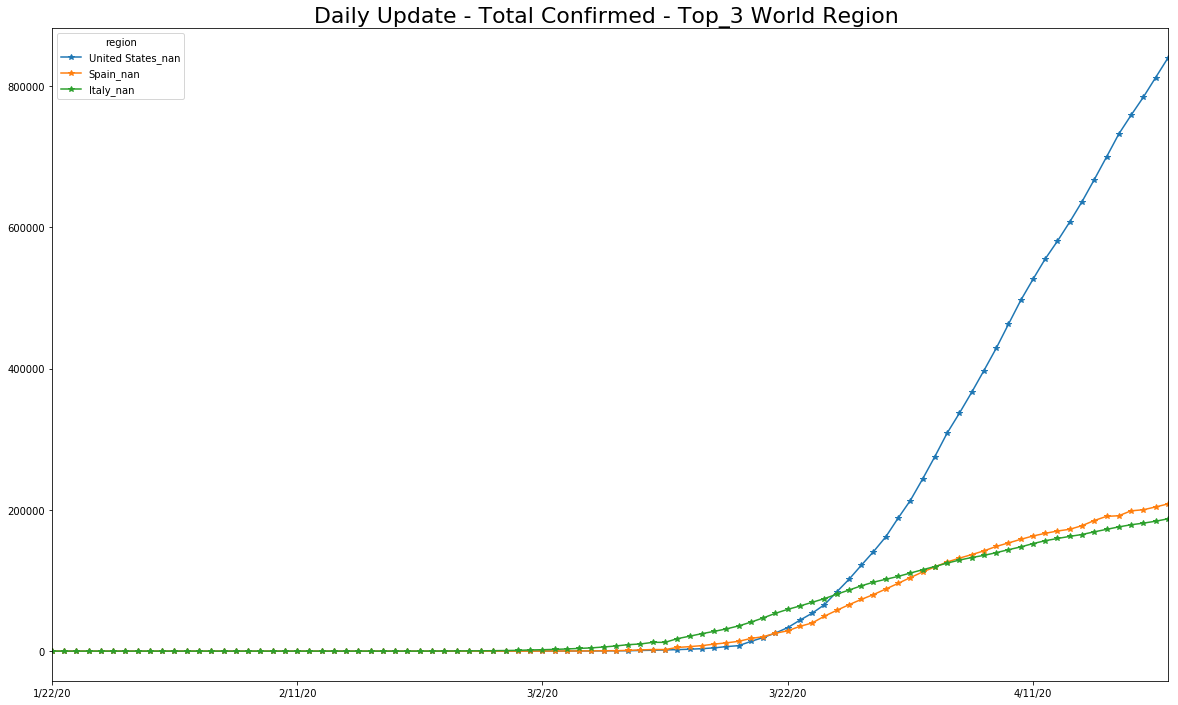

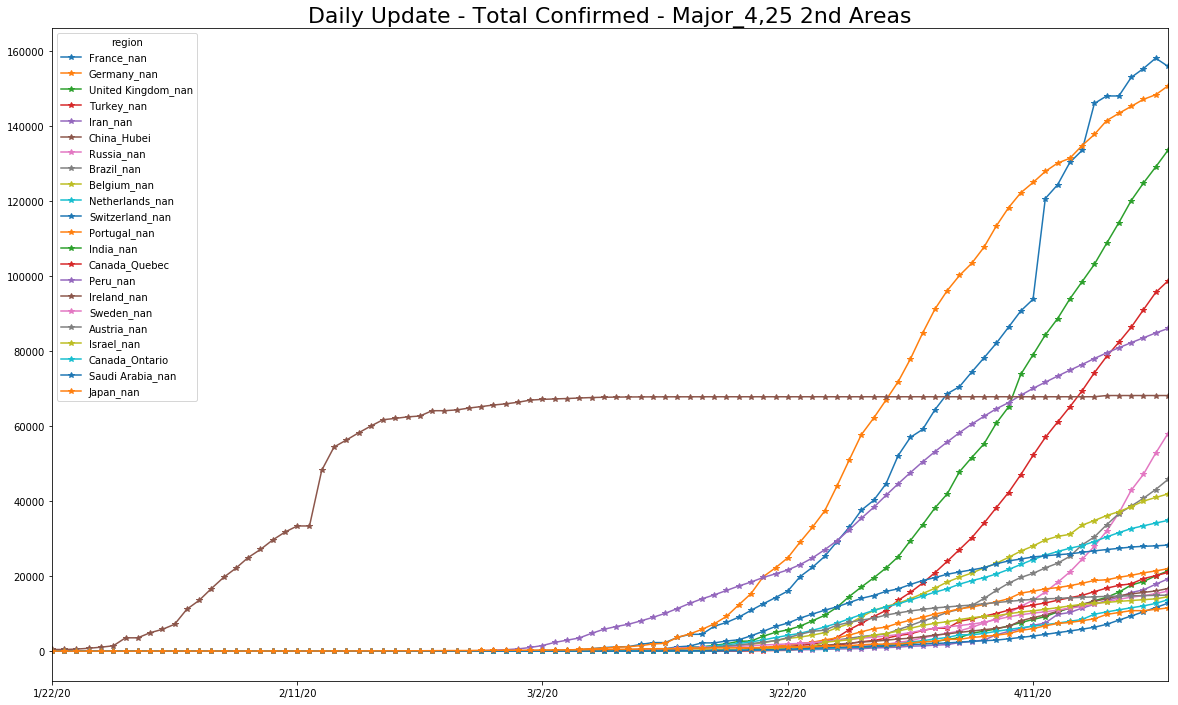

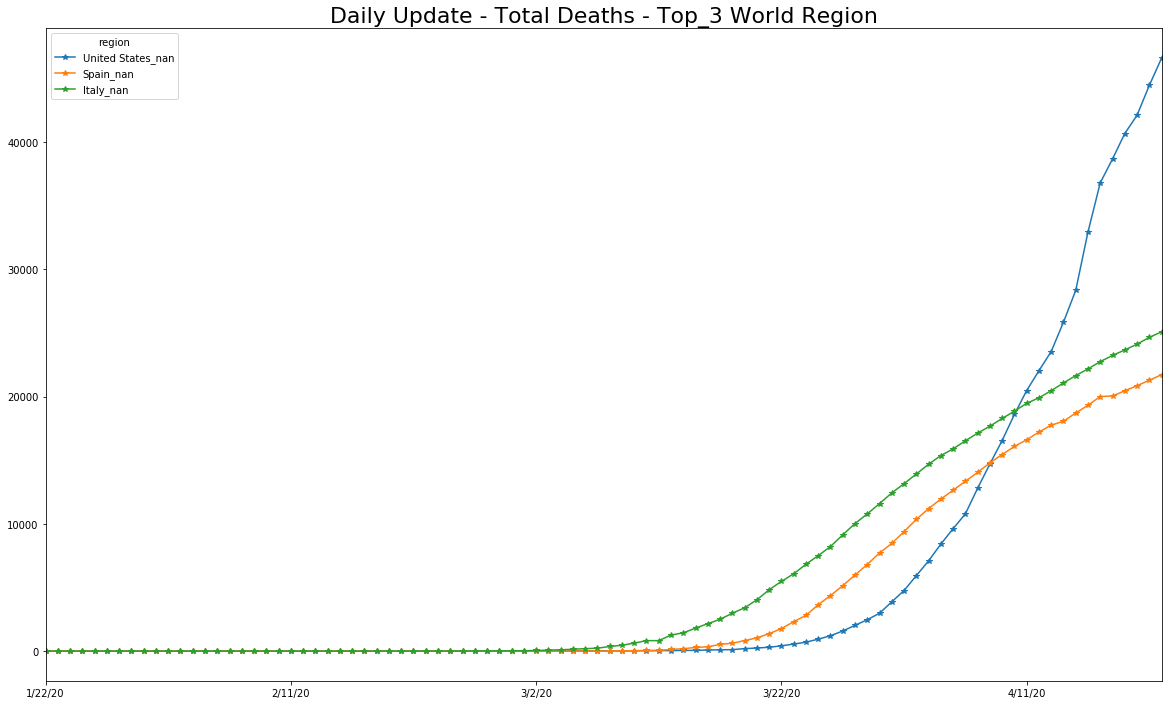

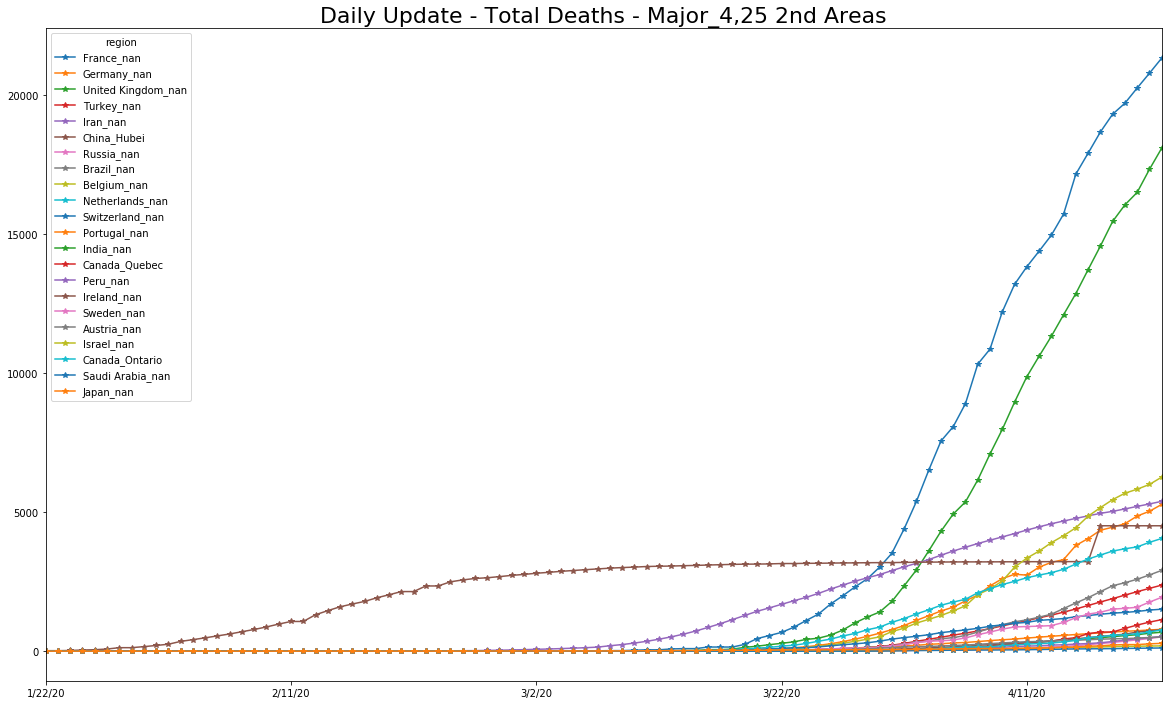

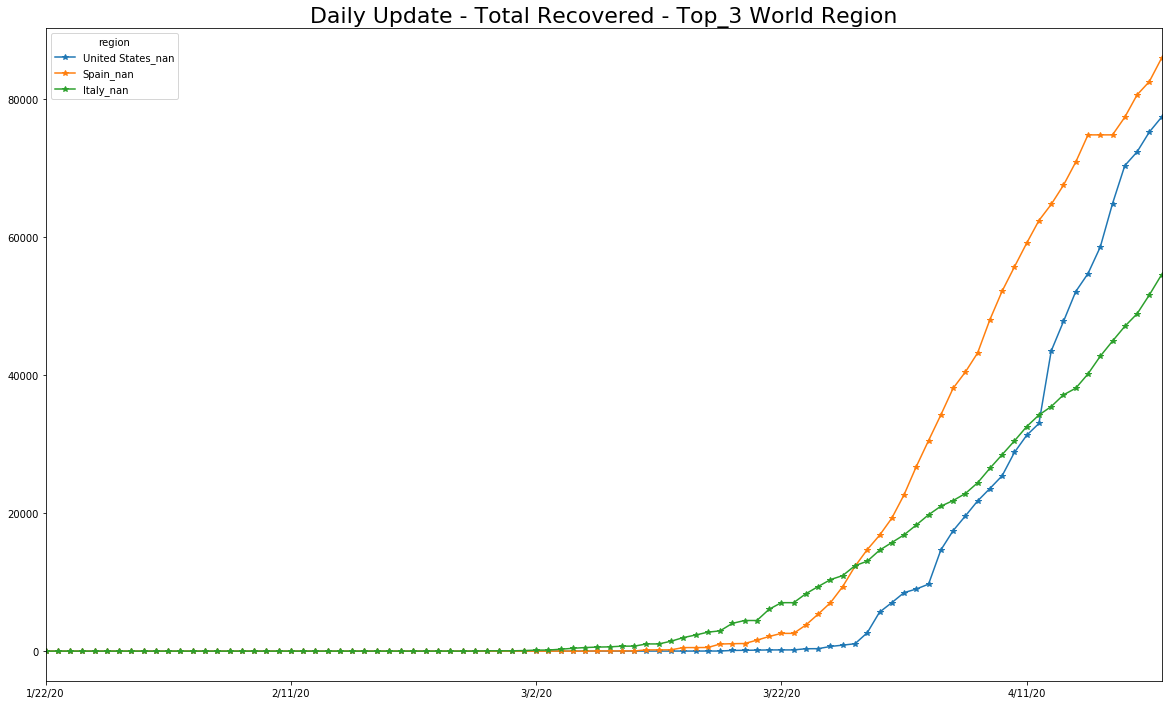

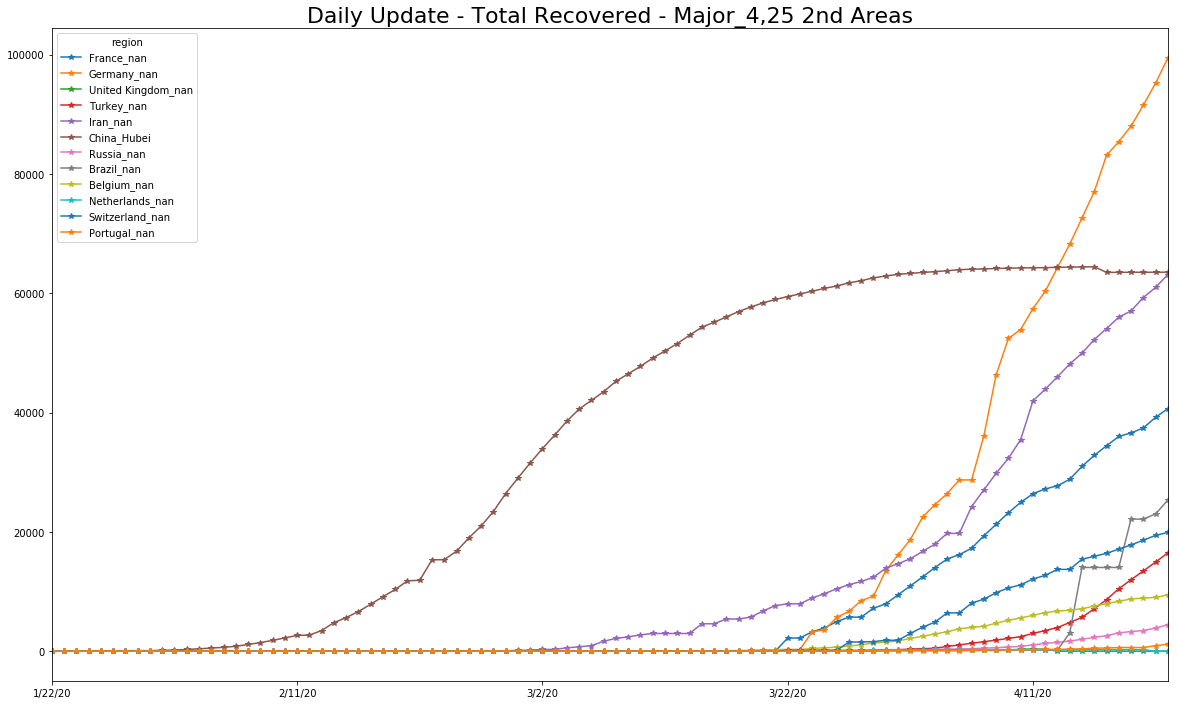

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/04/23


In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

date                     region   min   max
0   2020/04/24  Australia_New South Wales  15.6  24.4
1   2020/04/24                Belgium_nan   8.3  15.6
2   2020/04/24                 Brazil_nan  17.8  19.4
3   2020/04/24             Canada_Ontario -14.4  -8.7
4   2020/04/24              Canada_Quebec  -9.0  -8.0
5   2020/04/24              China_Beijing   8.0  20.0
6   2020/04/24            China_Guangdong  17.0  19.0
7   2020/04/24            China_Hong Kong  16.9  18.3
8   2020/04/24                China_Hubei  14.0  21.0
9   2020/04/24                China_Macau  20.0  22.0
10  2020/04/24             China_Shanghai  13.2  22.0
11  2020/04/24                Finland_nan  -2.2   3.9
12  2020/04/24                 France_nan  11.1  15.0
13  2020/04/24                Germany_nan   3.0  13.0
14  2020/04/24                  India_nan  26.0  39.1
15  2020/04/24                   Iran_nan   6.0  17.0
16  2020/04/24                  Italy_nan   8.4  13.4
17  2020/04/24                  Japan_nan  -2.2  10.5
18  2020/04/24           Korea, South_nan  -1.0  14.0
19  2020/04/24               Malaysia_nan  24.5  32.0
20  2020/04/24            Netherlands_nan  13.3  18.3
21  2020/04/24                 Norway_nan  -1.1   1.7
22  2020/04/24            Philippines_nan  26.7  31.7
23  2020/04/24                 Poland_nan   4.4  16.1
24  2020/04/24               Portugal_nan  10.5  12.2
25  2020/04/24                 Russia_nan   1.0  25.0
26  2020/04/24              Singapore_nan  27.5  32.5
27  2020/04/24                  Spain_nan  11.4  15.2
28  2020/04/24                 Sweden_nan   3.3   8.9
29  2020/04/24            Switzerland_nan   8.1  12.4
30  2020/04/24                Taiwan*_nan  15.0  18.0
31  2020/04/24                 Turkey_nan   4.6   7.6
32  2020/04/24         United Kingdom_nan   5.6   6.1
33  2020/04/24          United States_nan  12.8  13.5
34  2020/04/24                Vietnam_nan  27.0  31.0

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

#ts=ts[29:]
#ts_d=ts_d[29:]
#ts_rec=ts_rec[29:]

In [22]:
ts[-4:-1]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/19/20              996          562         2629          713          24   
4/20/20             1026          584         2718          717          24   
4/21/20             1092          609         2811          717          24   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/19/20                       23           2839         1291   
4/20/20                       23           2941         1339   
4/21/20                       23           3031         1401   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/19/20                                     103                       2926   
4/20/20                                     103                       2926   
4/21/20                                     103                       2926   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/19/20  ...             758809          517            1565            256   
4/20/20  ...             784326          535            1627            256   
4/21/20  ...             812036          535            1678            285   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/19/20          268                     437                   6          1   
4/20/20          268                     449                   6          1   
4/21/20          268                     466                   6          1   

region   Zambia_nan  Zimbabwe_nan  
4/19/20          61            25  
4/20/20          65            25  
4/21/20          70            28  

[3 rows x 264 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(2)

date       region   min   max
6304 2020-04-23  Vietnam_nan  26.0  31.0
6305 2020-04-24  Vietnam_nan  27.0  31.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10)
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
34    2020-02-25  Afghanistan_nan          1             1             1   
35    2020-02-26  Afghanistan_nan          1             0             1   
36    2020-02-27  Afghanistan_nan          1             0             1   
37    2020-02-28  Afghanistan_nan          1             0             0   
38    2020-02-29  Afghanistan_nan          1             0             0   
39    2020-03-01  Afghanistan_nan          1             0             0   
40    2020-03-02  Afghanistan_nan          1             0             0   
41    2020-03-03  Afghanistan_nan          1             0             0   
42    2020-03-04  Afghanistan_nan          1             0             0   
43    2020-03-05  Afghanistan_nan          1             0             0   
44    2020-03-06  Afghanistan_nan          1             0             0   
45    2020-03-07  Afghanistan_nan          1             0             0   
46    2020-03-08  Afghanistan_nan          4             0             0   
47    2020-03-09  Afghanistan_nan          4             3             3   
48    2020-03-10  Afghanistan_nan          5             0             3   
49    2020-03-11  Afghanistan_nan          7             1             4   
50    2020-03-12  Afghanistan_nan          7             2             3   
51    2020-03-13  Afghanistan_nan          7             0             3   
52    2020-03-14  Afghanistan_nan         11             0             2   
53    2020-03-15  Afghanistan_nan         16             4             4   
54    2020-03-16  Afghanistan_nan         21             5             9   
55    2020-03-17  Afghanistan_nan         22             5            14   
56    2020-03-18  Afghanistan_nan         22             1            11   
57    2020-03-19  Afghanistan_nan         22             0             6   
58    2020-03-20  Afghanistan_nan         24             0             1   
59    2020-03-21  Afghanistan_nan         24             2             2   
60    2020-03-22  Afghanistan_nan         40             0             2   
61    2020-03-23  Afghanistan_nan         40            16            18   
62    2020-03-24  Afghanistan_nan         74             0            16   
63    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
24708 2020-03-25     Zimbabwe_nan          3             0             0   
24709 2020-03-26     Zimbabwe_nan          3             0             0   
24710 2020-03-27     Zimbabwe_nan          5             0             0   
24711 2020-03-28     Zimbabwe_nan          7             2             2   
24712 2020-03-29     Zimbabwe_nan          7             2             4   
24713 2020-03-30     Zimbabwe_nan          7             0             4   
24714 2020-03-31     Zimbabwe_nan          8             0             2   
24715 2020-04-01     Zimbabwe_nan          8             1             1   
24716 2020-04-02     Zimbabwe_nan          9             0             1   
24717 2020-04-03     Zimbabwe_nan          9             1             2   
24718 2020-04-04     Zimbabwe_nan          9             0             1   
24719 2020-04-05     Zimbabwe_nan          9             0             1   
24720 2020-04-06     Zimbabwe_nan         10             0             0   
24721 2020-04-07     Zimbabwe_nan         11             1             1   
24722 2020-04-08     Zimbabwe_nan         11             1             2   
24723 2020-04-09     Zimbabwe_nan         11             0             2   
24724 2020-04-10     Zimbabwe_nan         13             0             1   
24725 2020-04-11     Zimbabwe_nan         14             2             2   
24726 2020-04-12     Zimbabwe_nan         14             1             3   
24727 2020-04-13     Zimbabwe_nan         17             0             3   
24728 2020-04-14     Zimbabwe_nan         17             3  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-01-22  Afghanistan_nan          0             0             0   
1     2020-01-23  Afghanistan_nan          0             0             0   
2     2020-01-24  Afghanistan_nan          0             0             0   
3     2020-01-25  Afghanistan_nan          0             0             0   
4     2020-01-26  Afghanistan_nan          0             0             0   
5     2020-01-27  Afghanistan_nan          0             0             0   
6     2020-01-28  Afghanistan_nan          0             0             0   
7     2020-01-29  Afghanistan_nan          0             0             0   
8     2020-01-30  Afghanistan_nan          0             0             0   
9     2020-01-31  Afghanistan_nan          0             0             0   
10    2020-02-01  Afghanistan_nan          0             0             0   
11    2020-02-02  Afghanistan_nan          0             0             0   
12    2020-02-03  Afghanistan_nan          0             0             0   
13    2020-02-04  Afghanistan_nan          0             0             0   
14    2020-02-05  Afghanistan_nan          0             0             0   
15    2020-02-06  Afghanistan_nan          0             0             0   
16    2020-02-07  Afghanistan_nan          0             0             0   
17    2020-02-08  Afghanistan_nan          0             0             0   
18    2020-02-09  Afghanistan_nan          0             0             0   
19    2020-02-10  Afghanistan_nan          0             0             0   
20    2020-02-11  Afghanistan_nan          0             0             0   
21    2020-02-12  Afghanistan_nan          0             0             0   
22    2020-02-13  Afghanistan_nan          0             0             0   
23    2020-02-14  Afghanistan_nan          0             0             0   
24    2020-02-15  Afghanistan_nan          0             0             0   
25    2020-02-16  Afghanistan_nan          0             0             0   
26    2020-02-17  Afghanistan_nan          0             0             0   
93    2020-01-22      Albania_nan          0             0             0   
94    2020-01-23      Albania_nan          0             0             0   
95    2020-01-24      Albania_nan          0             0             0   
...          ...              ...        ...           ...           ...   
24708 2020-03-25     Zimbabwe_nan          3             0             0   
24709 2020-03-26     Zimbabwe_nan          3             0             0   
24710 2020-03-27     Zimbabwe_nan          5             0             0   
24711 2020-03-28     Zimbabwe_nan          7             2             2   
24712 2020-03-29     Zimbabwe_nan          7             2             4   
24713 2020-03-30     Zimbabwe_nan          7             0             4   
24714 2020-03-31     Zimbabwe_nan          8             0             2   
24715 2020-04-01     Zimbabwe_nan          8             1             1   
24716 2020-04-02     Zimbabwe_nan          9             0             1   
24717 2020-04-03     Zimbabwe_nan          9             1             2   
24718 2020-04-04     Zimbabwe_nan          9             0             1   
24719 2020-04-05     Zimbabwe_nan          9             0             1   
24720 2020-04-06     Zimbabwe_nan         10             0             0   
24721 2020-04-07     Zimbabwe_nan         11             1             1   
24722 2020-04-08     Zimbabwe_nan         11             1             2   
24723 2020-04-09     Zimbabwe_nan         11             0             2   
24724 2020-04-10     Zimbabwe_nan         13             0             1   
24725 2020-04-11     Zimbabwe_nan         14             2             2   
24726 2020-04-12     Zimbabwe_nan         14             1             3   
24727 2020-04-13     Zimbabwe_nan         17             0             3   
24728 2020-04-14     Zimbabwe_nan         17             3  

In [37]:
train.to_csv(r'data/train.csv', index = False, header=True)

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
254  United States_nan  8.244375e+09  90798.542486  12319.369565


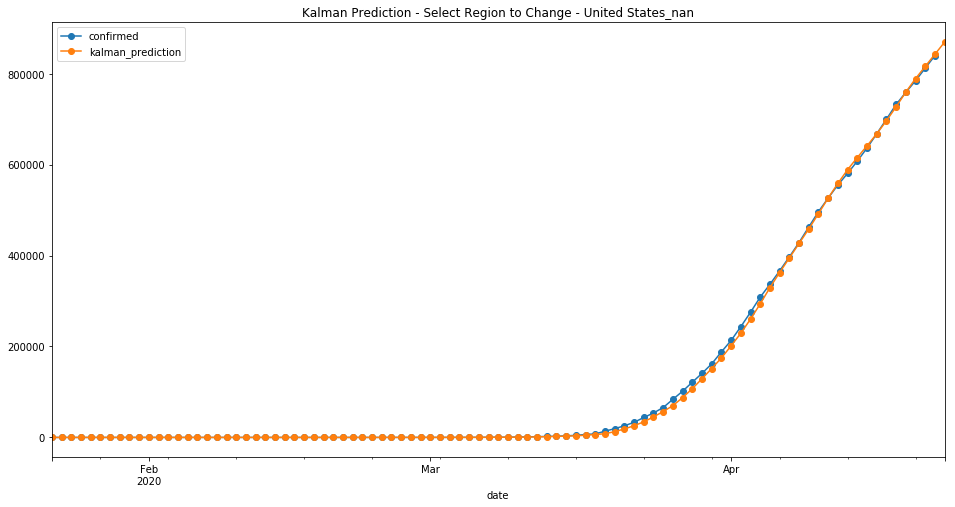

In [38]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [39]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwzdslwk1
  JVM stdout: /tmp/tmpwzdslwk1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwzdslwk1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 27 days !!!
H2O cluster name:           H2O_from_python_unknownUser_lb3phk
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [40]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-45)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-09
last_train_date= 2020-04-22
first_bootstrap_date= 2020-04-14
boost_bootstrap_date= 2020-04-19
first_test_date= 2020-04-13
last_test_date= 2020-04-23
first_valid_date= 2020-04-21


In [41]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [42]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [43]:
pred2.iloc[175:195]

0  confirmed       date          region
175  1405.0       1398 2020-04-19  Azerbaijan_nan
176  1430.0       1436 2020-04-20  Azerbaijan_nan
177  1456.0       1480 2020-04-21  Azerbaijan_nan
178  1500.0       1518 2020-04-22  Azerbaijan_nan
179  1544.0          0 2020-04-23  Azerbaijan_nan
180    45.0         49 2020-04-14     Bahamas_nan
181    44.0         49 2020-04-15     Bahamas_nan
182    43.0         53 2020-04-16     Bahamas_nan
183    49.0         54 2020-04-17     Bahamas_nan
184    49.0         55 2020-04-18     Bahamas_nan
185    50.0         55 2020-04-19     Bahamas_nan
186    48.0         60 2020-04-20     Bahamas_nan
187    55.0         65 2020-04-21     Bahamas_nan
188    63.0         65 2020-04-22     Bahamas_nan
189    64.0          0 2020-04-23     Bahamas_nan
190  1496.0       1528 2020-04-14     Bahrain_nan
191  1701.0       1671 2020-04-15     Bahrain_nan
192  1876.0       1700 2020-04-16     Bahrain_nan
193  1872.0       1740 2020-04-17     Bahrain_nan
194  1866.0       1773 2020-04-18     Bahrain_nan

In [44]:
pred2.iloc[220:240]

0  confirmed       date       region
220   3221.0       3281 2020-04-14  Belarus_nan
221   3621.0       3728 2020-04-15  Belarus_nan
222   4073.0       4204 2020-04-16  Belarus_nan
223   4586.0       4779 2020-04-17  Belarus_nan
224   5209.0       4779 2020-04-18  Belarus_nan
225   5224.0       4779 2020-04-19  Belarus_nan
226   5068.0       6264 2020-04-20  Belarus_nan
227   6407.0       6723 2020-04-21  Belarus_nan
228   7303.0       7281 2020-04-22  Belarus_nan
229   8076.0          0 2020-04-23  Belarus_nan
230  31961.0      31119 2020-04-14  Belgium_nan
231  32276.0      33573 2020-04-15  Belgium_nan
232  34459.0      34809 2020-04-16  Belgium_nan
233  36136.0      36138 2020-04-17  Belgium_nan
234  37792.0      37183 2020-04-18  Belgium_nan
235  38351.0      38496 2020-04-19  Belgium_nan
236  39648.0      39983 2020-04-20  Belgium_nan
237  41002.0      40956 2020-04-21  Belgium_nan
238  42183.0      41889 2020-04-22  Belgium_nan
239  43053.0          0 2020-04-23  Belgium_nan

In [45]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)


training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  156097.70386740967
# MSE on the validation data =  7656921548.9559765
# R^2 on the training data =  0.9999913410949431
# R^2 on the validation data 0.46923915220304435


In [47]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1587631986019_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 156097.70386740967
RMSE: 395.0920194934462
MAE: 12.58922257833379
RMSLE: 0.04056034211501654
Mean Residual Deviance: 156097.70386740967

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 7656921548.9559765
RMSE: 87503.83733846177
MAE: 22153.300394538746
RMSLE: 5.618131758596654
Mean Residual Deviance: 7656921548.9559765
Scoring History: 


timestamp            duration    number_of_trees    training_rmse      training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  -----------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2020-04-23 08:53:33  0.184 sec   0.0                nan                nan                 nan                  nan                nan                 nan
     2020-04-23 08:53:33  0.784 sec   1.0                717.4872447801562  20.68770272908535   514787.9464222197    88119.42293291996  21650.07629045759   7765032698.030819
     2020-04-23 08:53:34  1.059 sec   2.0                828.6769566509273  21.015440991248248  686705.4984842428    88794.68058107099  22082.189805385045  7884495299.494427
     2020-04-23 08:53:34  1.275 sec   3.0                863.4153612925497  19.310905906123693  745486.0861159442    89014.230148256    22254.43018895709   7923533168.886688
     2020-04-23 08:53:34  1.508 sec   4.0                662.853439115416   17.413267061173293  439374.6817471345    88980.7543344085   22160.472830054874  7917574641.920356
---  ---                  ---         ---                ---                ---                 ---                  ---                ---                 ---
     2020-04-23 08:53:53  20.320 sec  279.0              413.8213190775196  13.405683272443397  171248.08412305827   87115.84160437065  22129.37167607321   7589169858.437796
     2020-04-23 08:53:57  24.383 sec  339.0              394.7162450521642  13.125475065088246  155800.91410808015   87181.68216694445  22128.324984230785  7600645705.458118
     2020-04-23 08:54:01  28.388 sec  396.0              390.5626929993204  12.730814576991607  152539.2171628814    87289.80434060686  22131.506215064077  7619509941.821427
     2020-04-23 08:54:05  32.439 sec  454.0              387.3936605010955  12.623530811205342  150073.84819643805   87404.00786550995  22140.419593292267  7639460590.954126
     2020-04-23 08:54:08  35.773 sec  500.0              395.0920194934462  12.58922257833379   156097.70386740967   87503.83733846177  22153.300394538746  7656921548.9559765


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           2.91508e+17            1                    0.320676
kalman_prediction  2.43445e+17            0.835122             0.267804
7_day_change       1.55045e+17            0.531873             0.170559
3_day_change       9.73083e+16            0.33381              0.107045
1_day_change       6.17728e+16            0.211908             0.0679538
region             5.07354e+16            0.174045             0.055812
infected_rate      6.89651e+15            0.023658             0.00758658
min                1.35506e+15            0.00464844           0.00149065
max                3.05425e+14            0.00104774           0.000335986
7_day_change_rate  2.3836e+14             0.000817679          0.00026221
1_day_change_rate  2.24882e+14            0.000771443          0.000247384
3_day_change_rate  2.06137e+14            0.000707142          0.000226764

In [48]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         2.915079e+17           1.000000    0.320676
1   kalman_prediction         2.434447e+17           0.835122    0.267804
2        7_day_change         1.550452e+17           0.531873    0.170559
3        3_day_change         9.730833e+16           0.333810    0.107045
4        1_day_change         6.177277e+16           0.211908    0.067954
5              region         5.073538e+16           0.174045    0.055812
6       infected_rate         6.896506e+15           0.023658    0.007587
7                 min         1.355058e+15           0.004648    0.001491
8                 max         3.054249e+14           0.001048    0.000336
9   7_day_change_rate         2.383598e+14           0.000818    0.000262
10  1_day_change_rate         2.248817e+14           0.000771    0.000247
11  3_day_change_rate         2.061374e+14           0.000707    0.000227

In [49]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


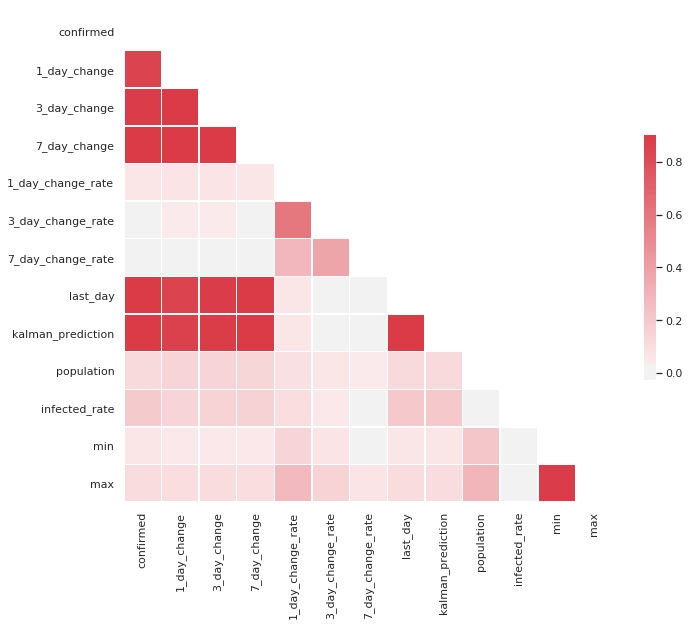

In [50]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [51]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.855723
3_day_change         0.883175
7_day_change         0.908396
1_day_change_rate    0.061541
3_day_change_rate    0.027277
7_day_change_rate    0.005349
last_day             0.953444
kalman_prediction    0.954680
population           0.118518
infected_rate        0.194967
min                  0.059131
max                  0.114201
Name: confirmed, dtype: float64


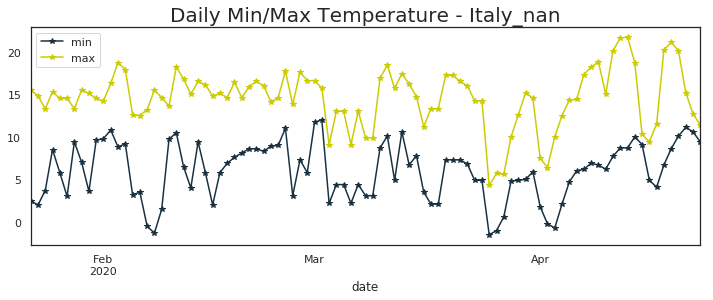

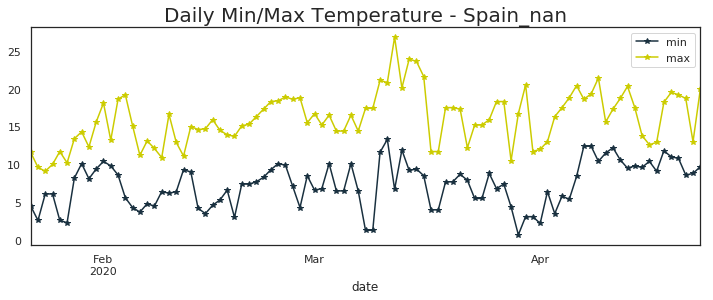

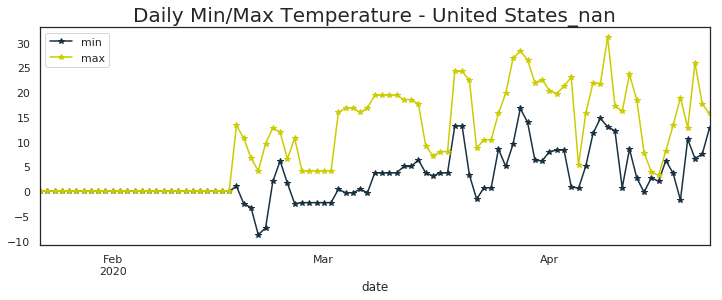

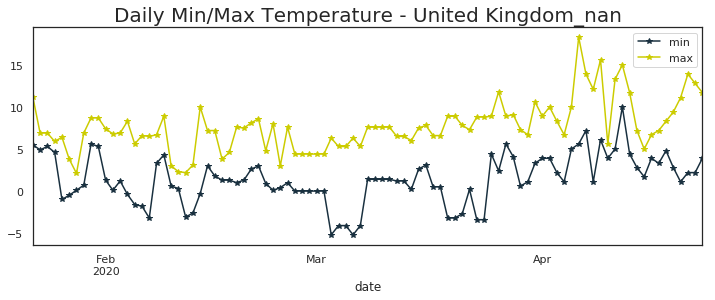

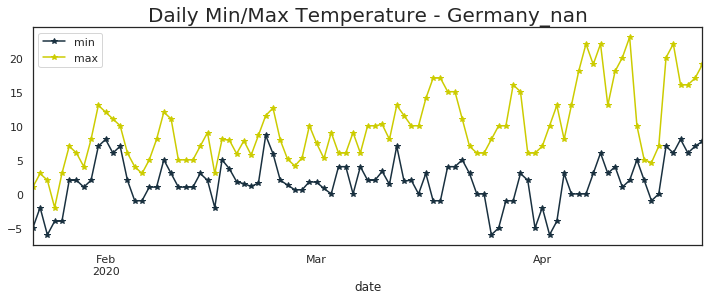

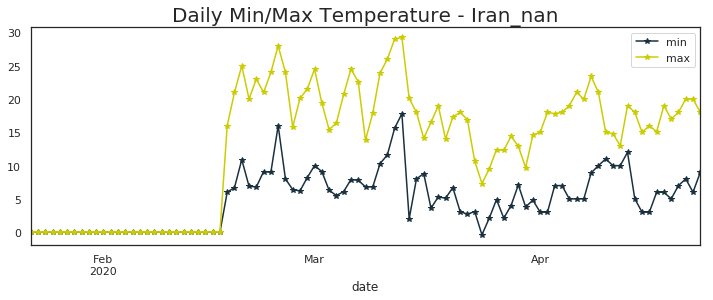

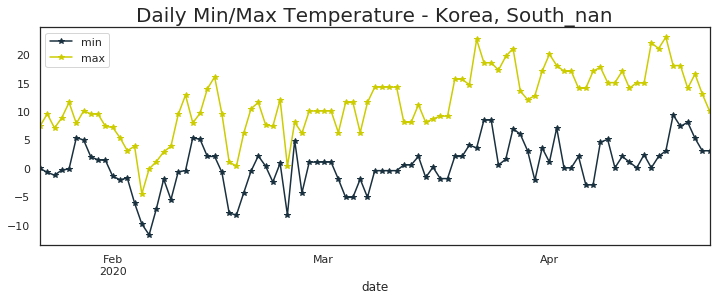

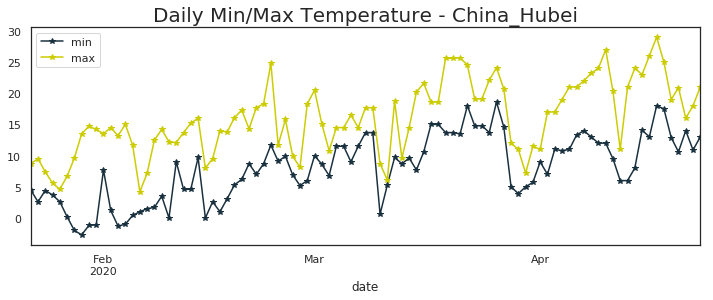

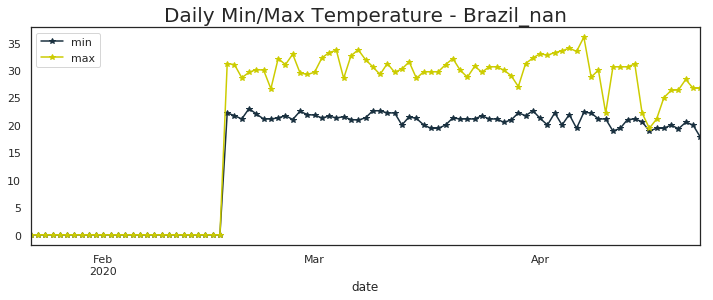

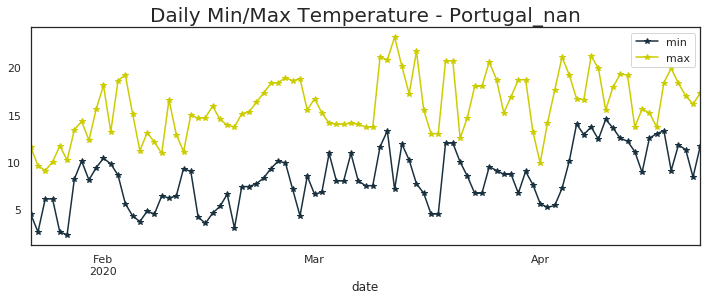

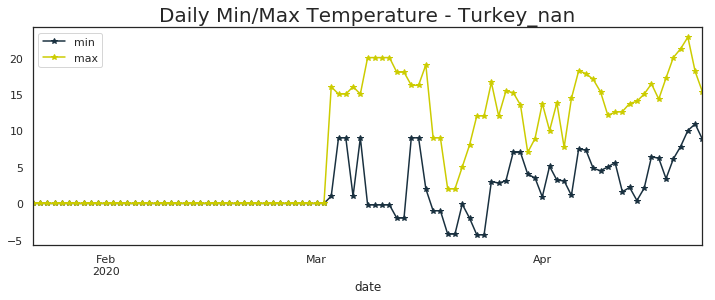

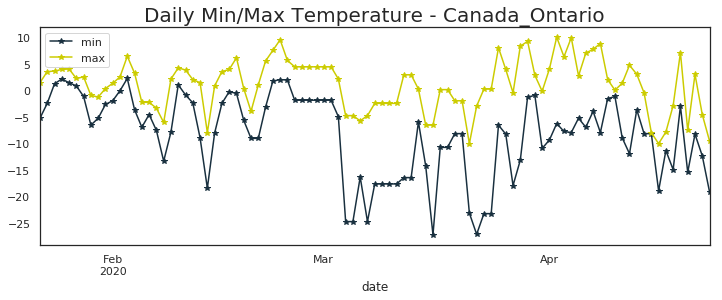

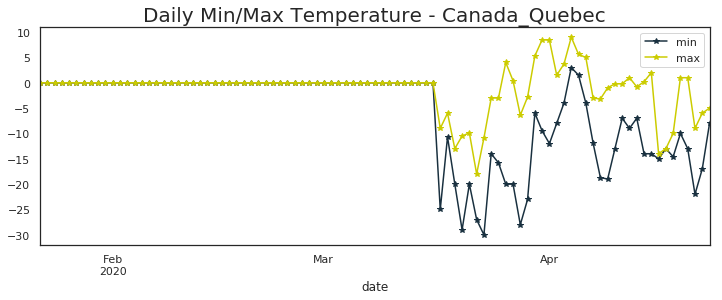

In [52]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [53]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  21.7
France_nan                  13.0  23.0
Germany_nan                  8.6  23.0
United Kingdom_nan          10.0  18.3
Turkey_nan                  10.9  22.8
Iran_nan                    17.8  29.3
China_Hubei                 18.6  29.0
Russia_nan                   5.0  25.0
Brazil_nan                  23.0  36.0
Belgium_nan                 17.8  26.1
Netherlands_nan             13.3  26.1
Switzerland_nan             11.2  19.7
Portugal_nan                14.5  23.2
India_nan                   28.0  42.0
Canada_Quebec                3.0   9.0
Peru_nan                     0.0   0.0
Ireland_nan                  0.0   0.0
Sweden_nan                   6.1  18.9
Austria_nan                  2.6  11.7
Israel_nan                  12.9  24.7
Canada_Ontario              

### Kalman X Days Ahead Prediction

In [54]:
%%R

#install.packages('reshape')

NULL


In [55]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [56]:
all_new=%R all_new

In [57]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

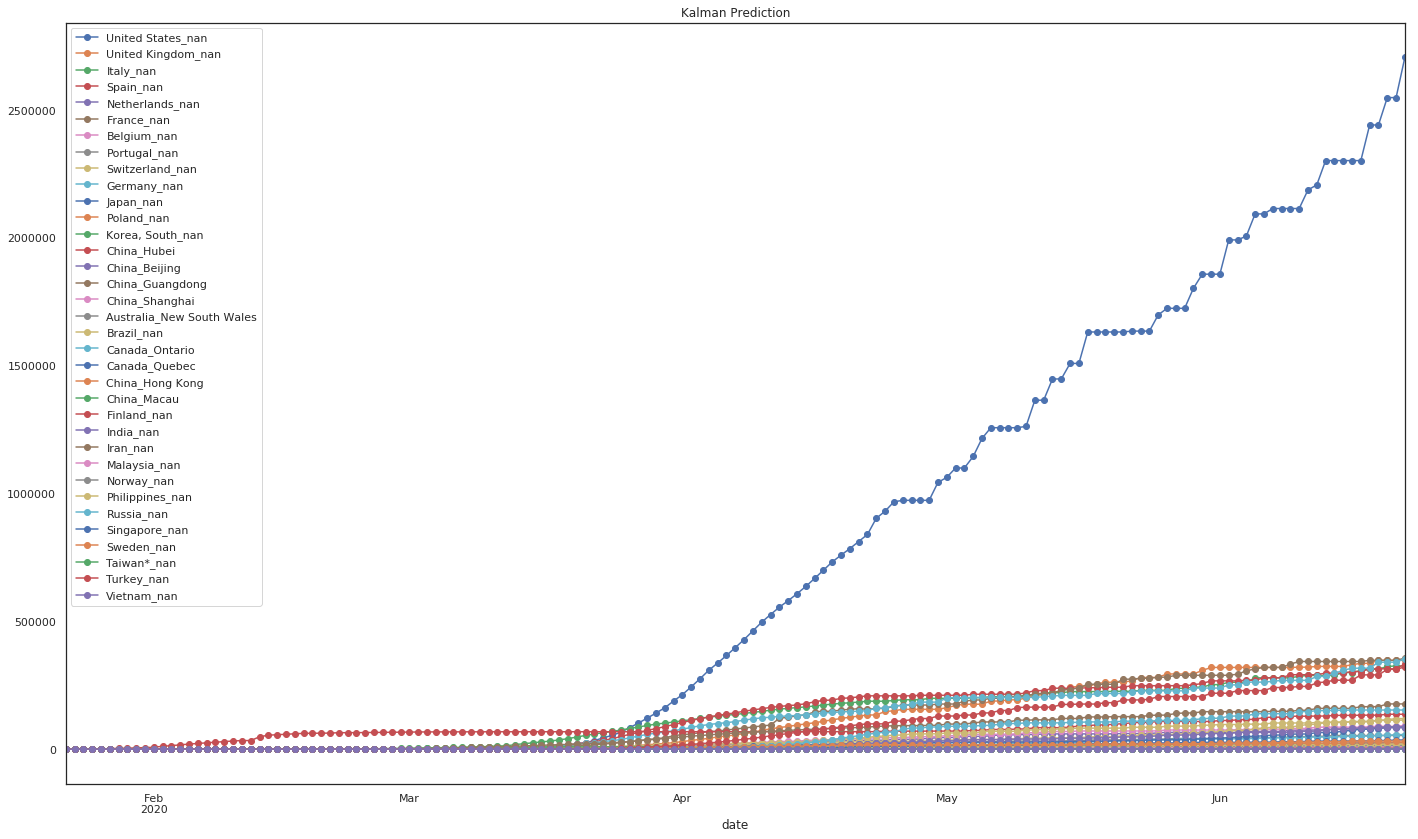

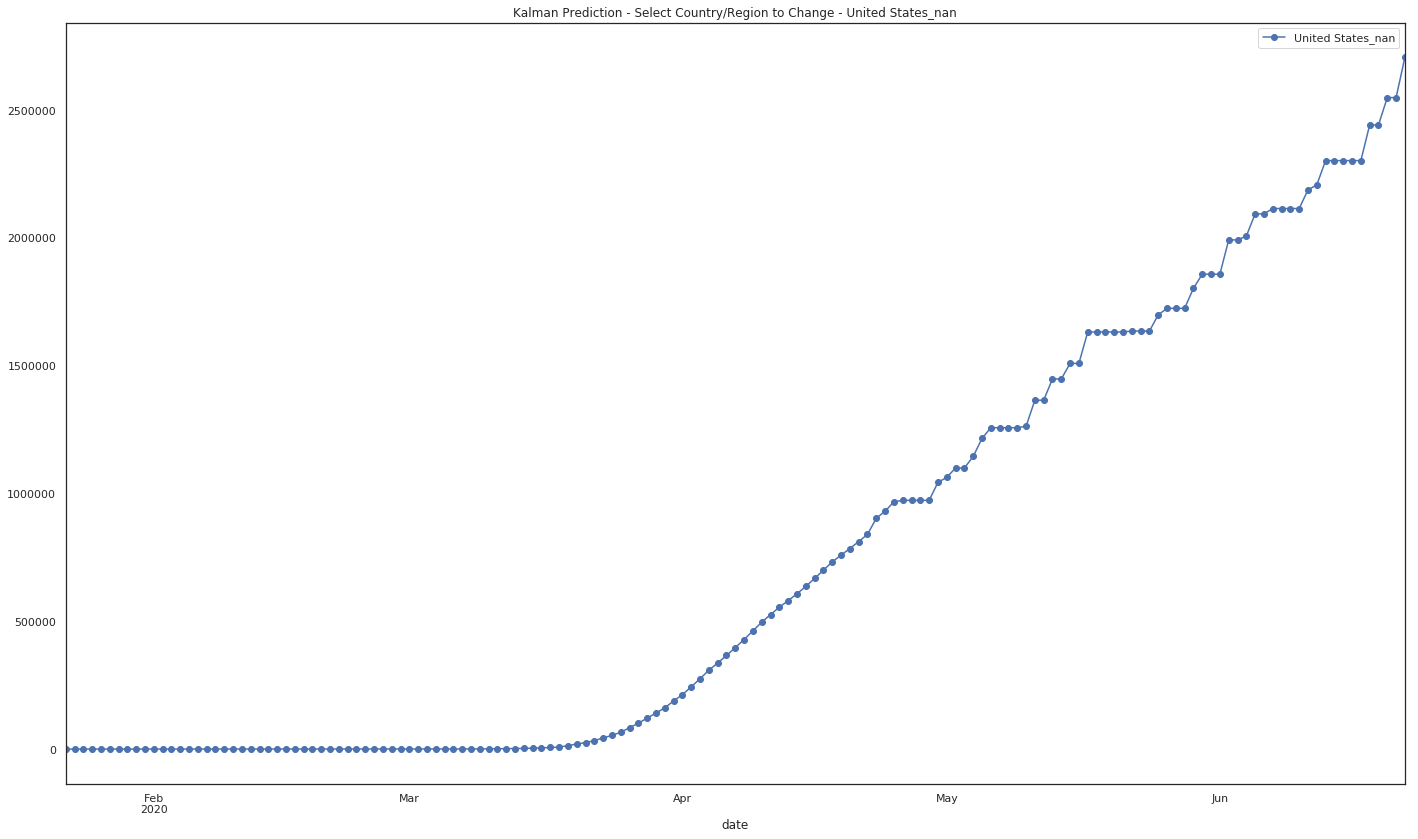

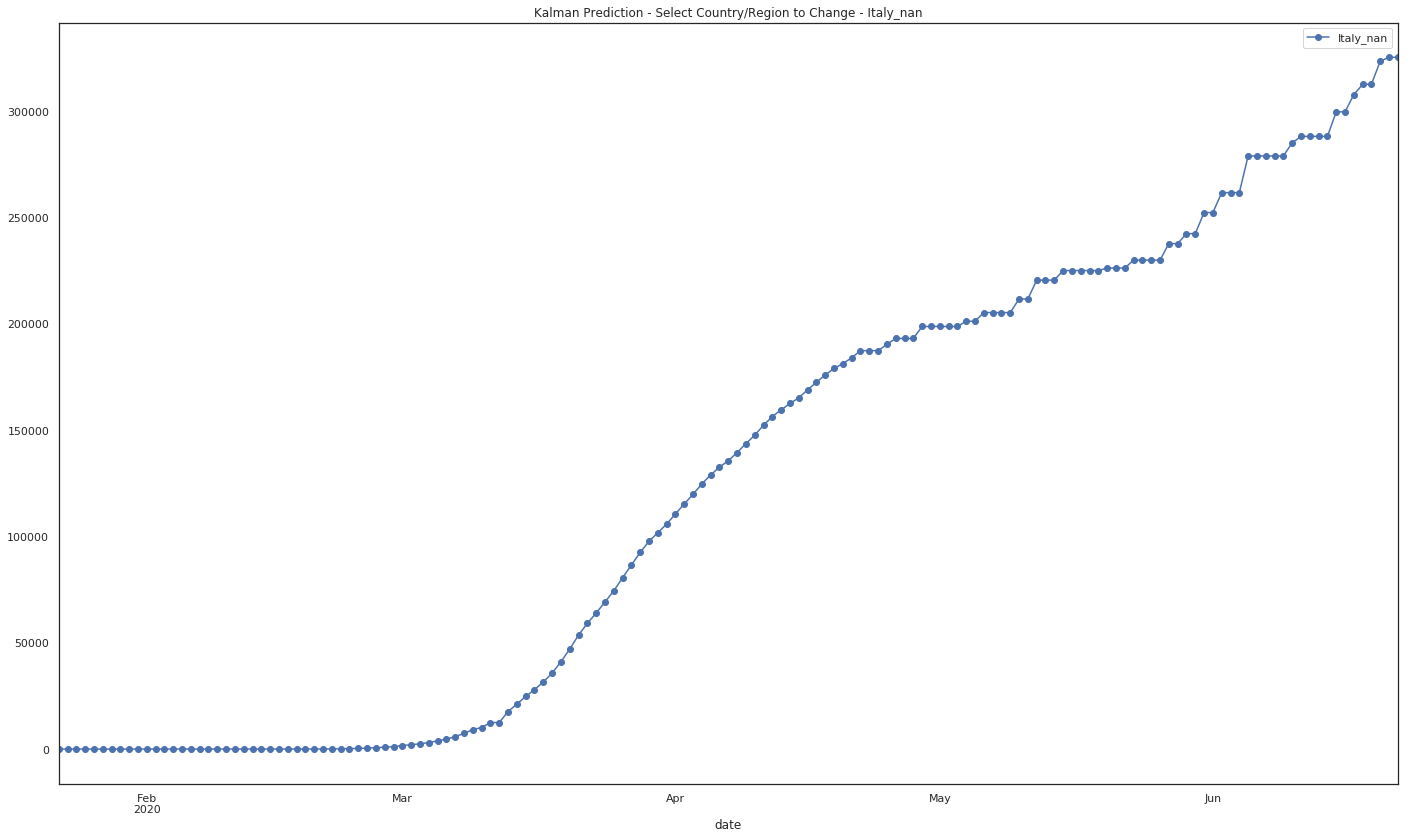

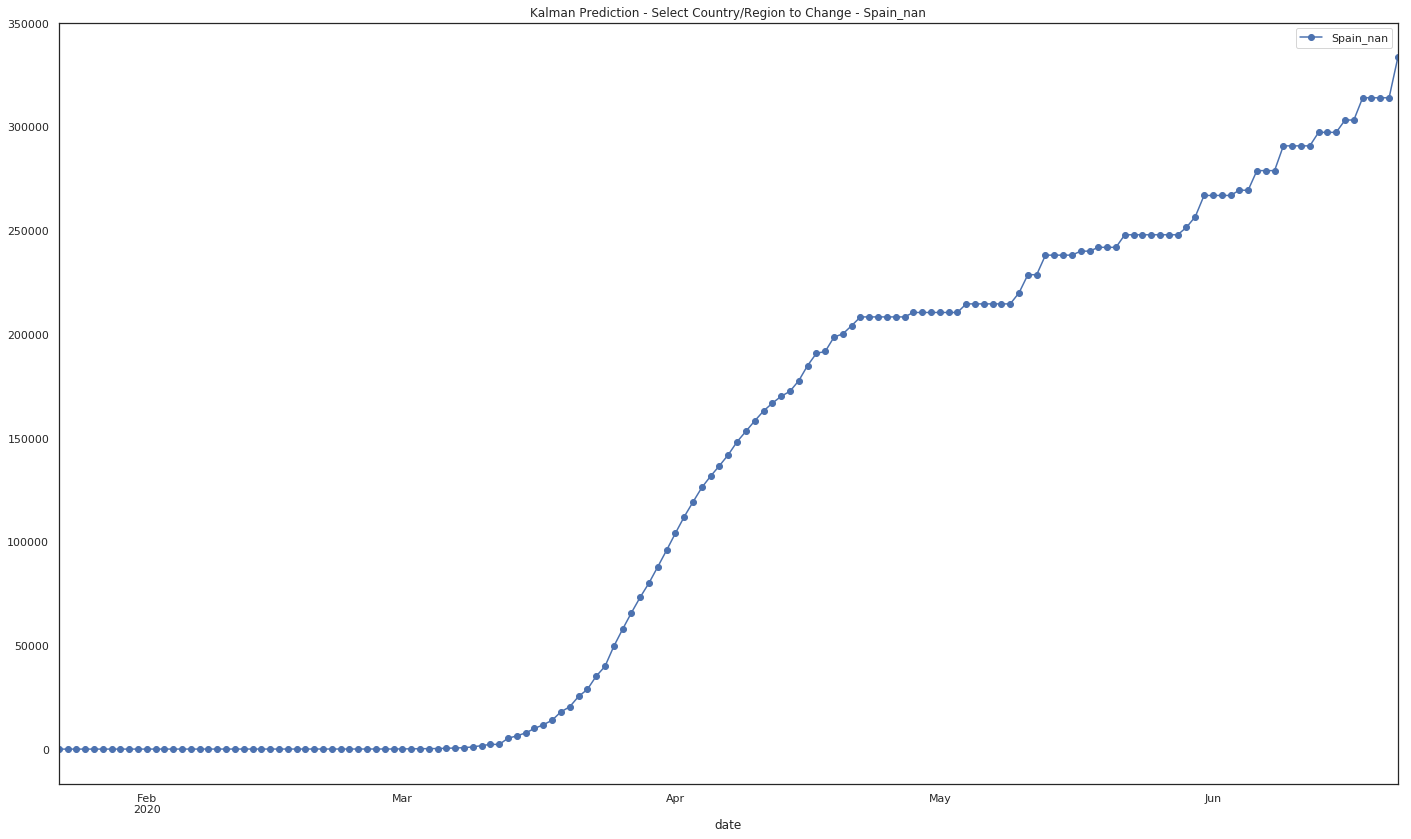

In [58]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


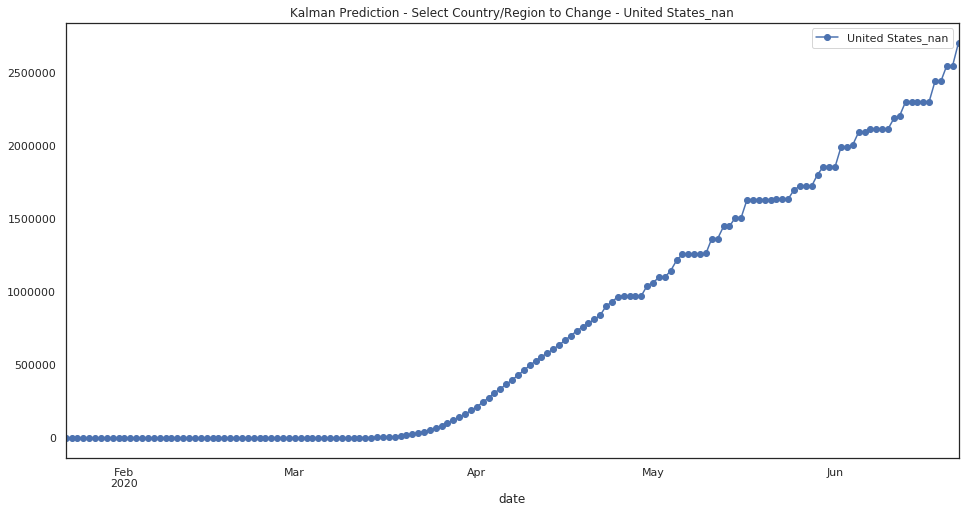

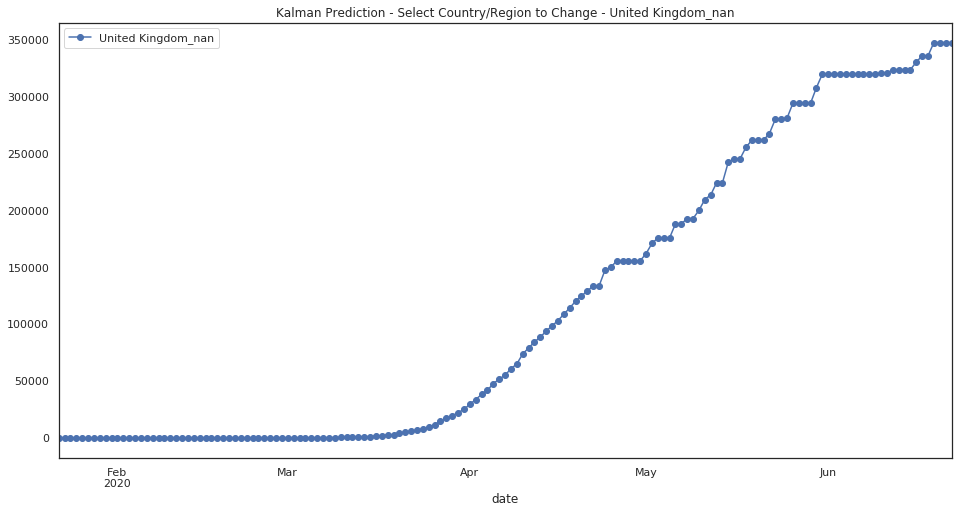

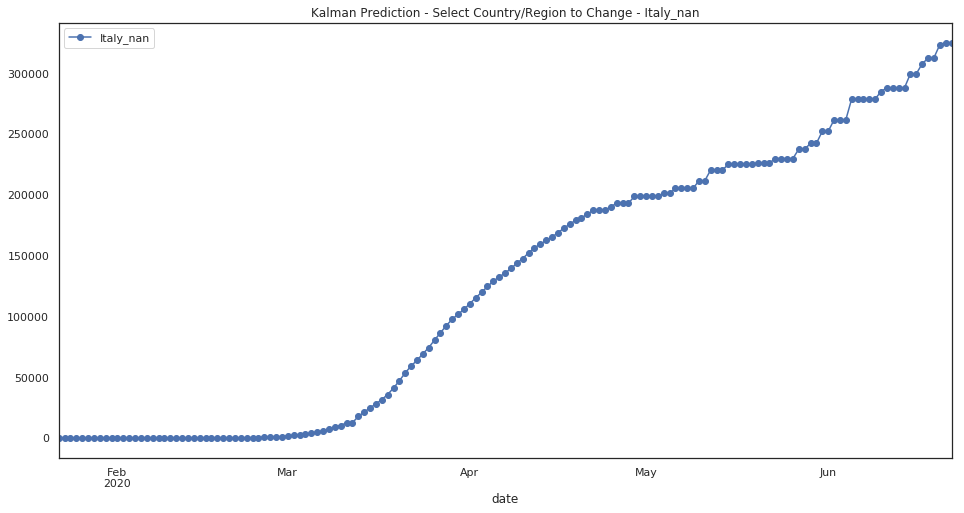

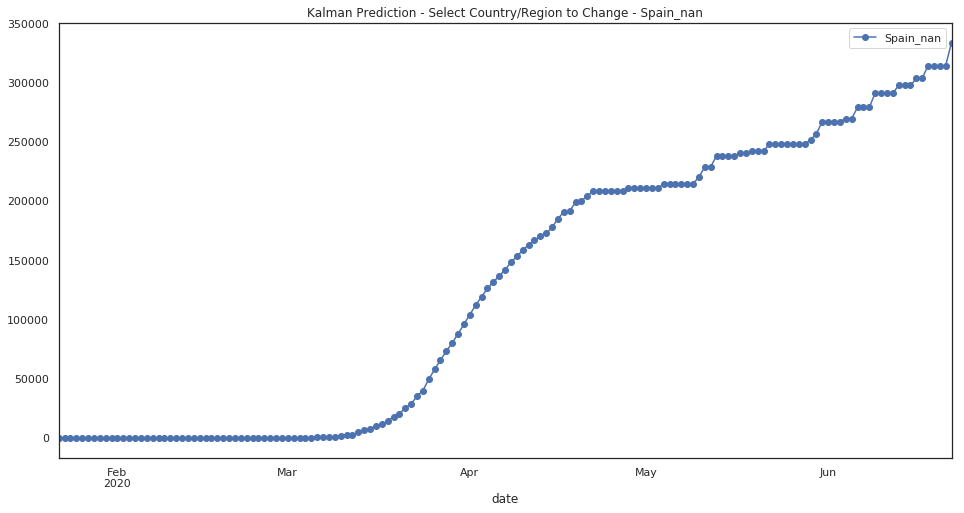

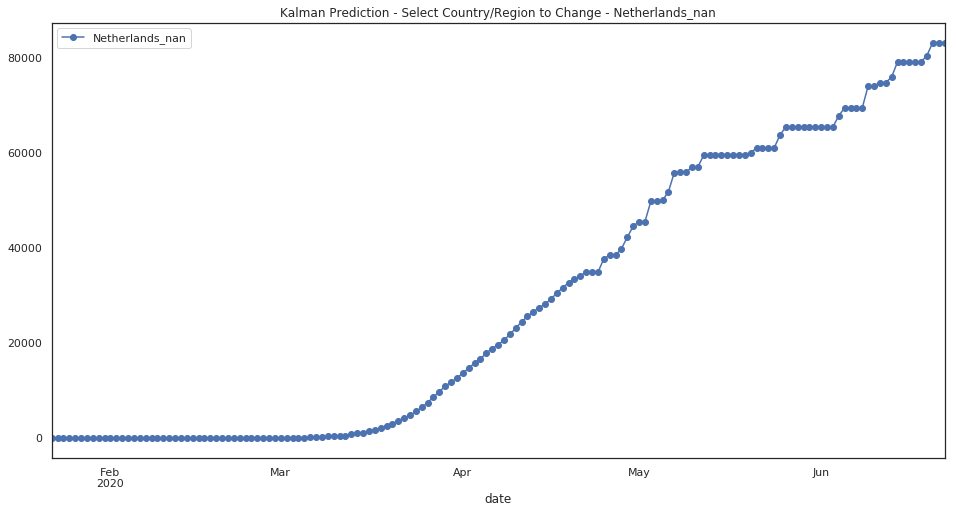

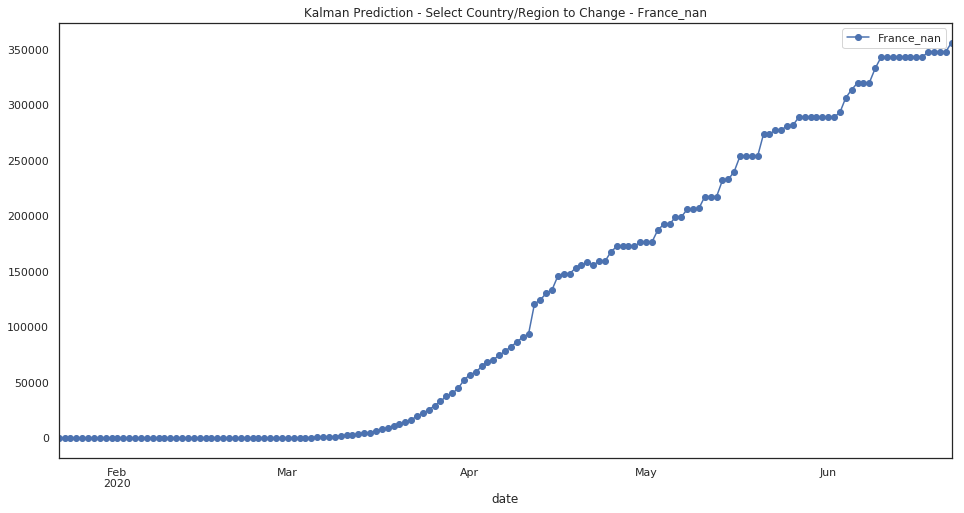

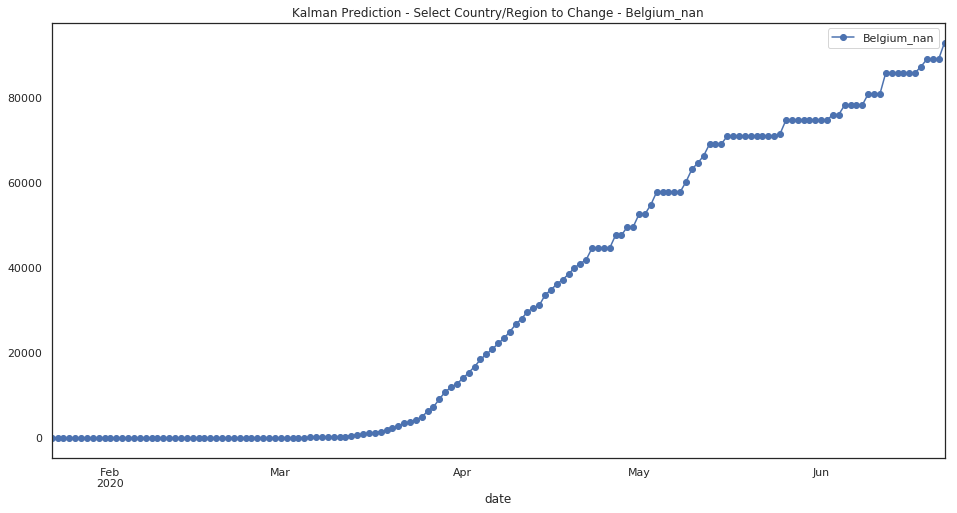

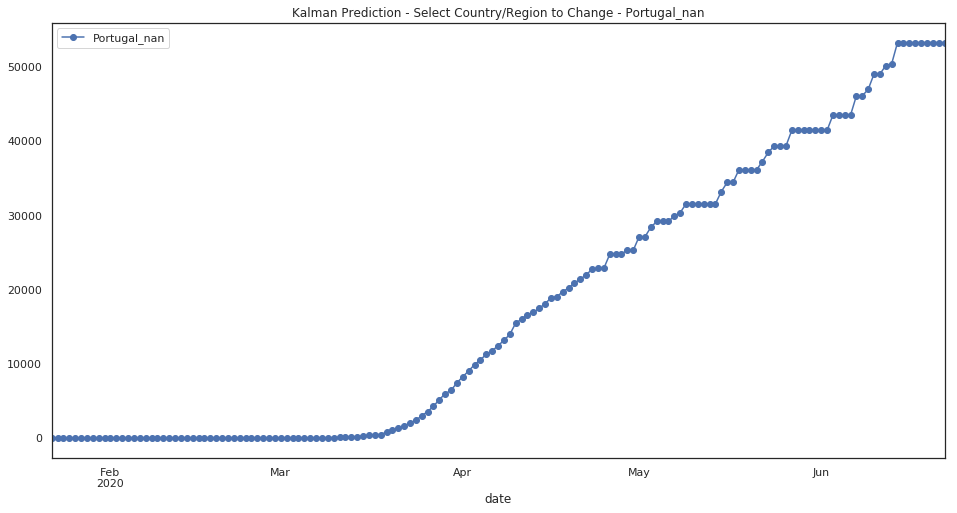

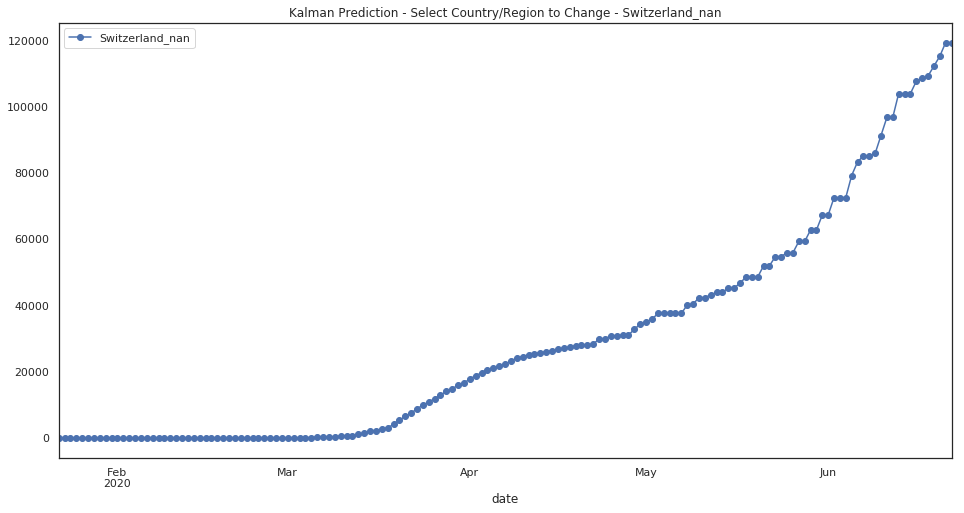

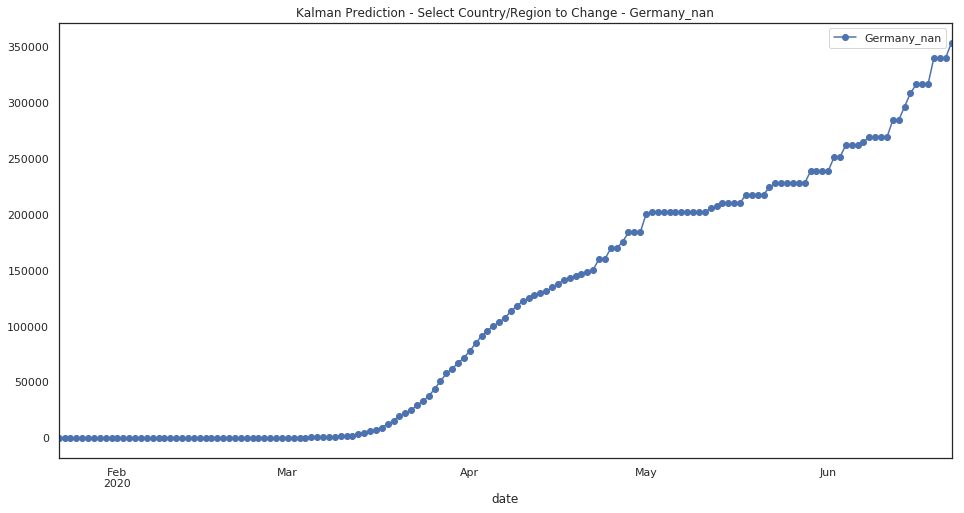

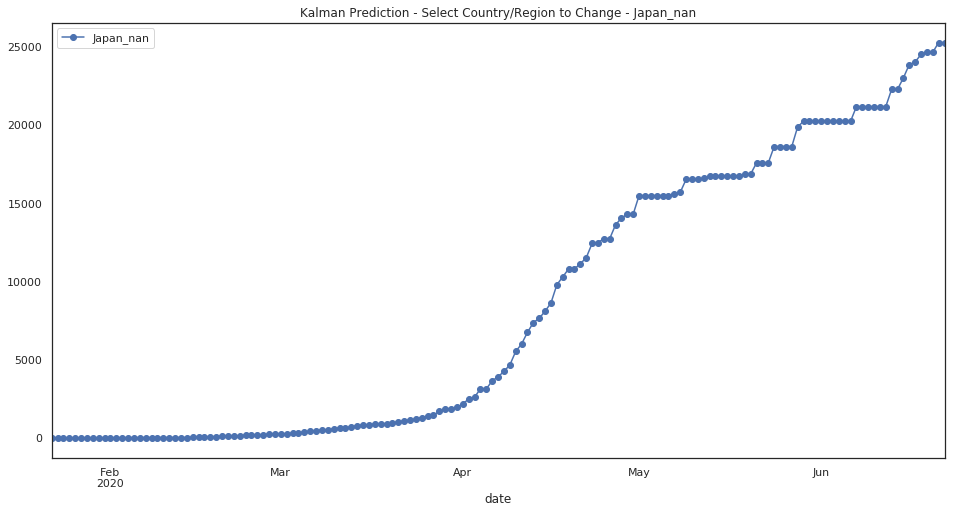

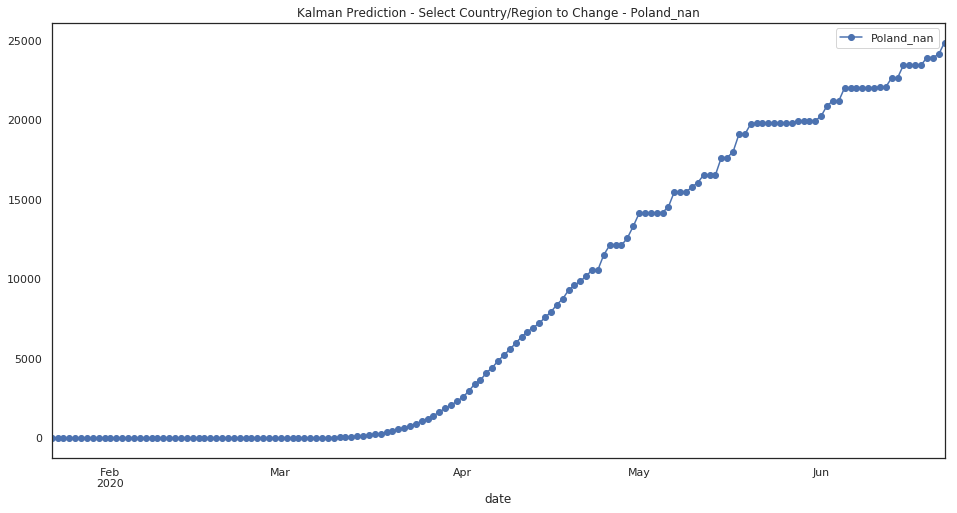

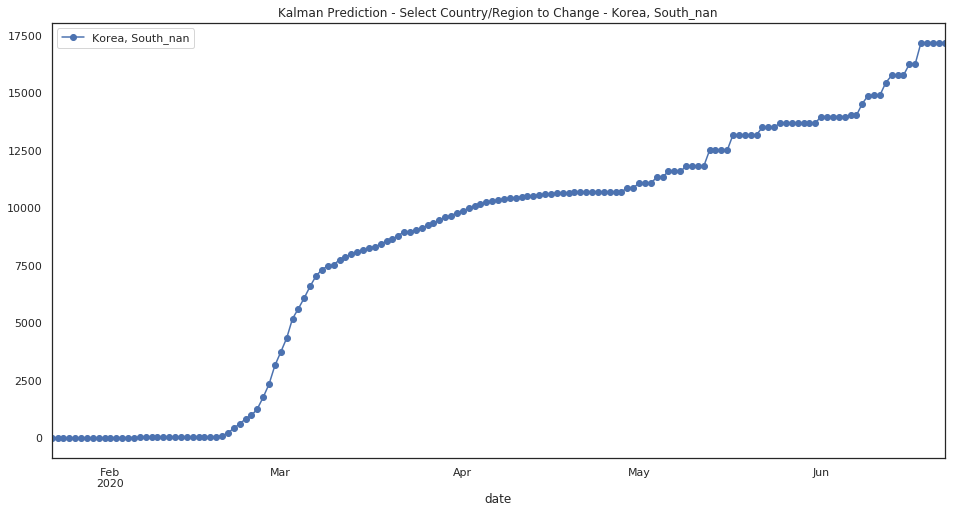

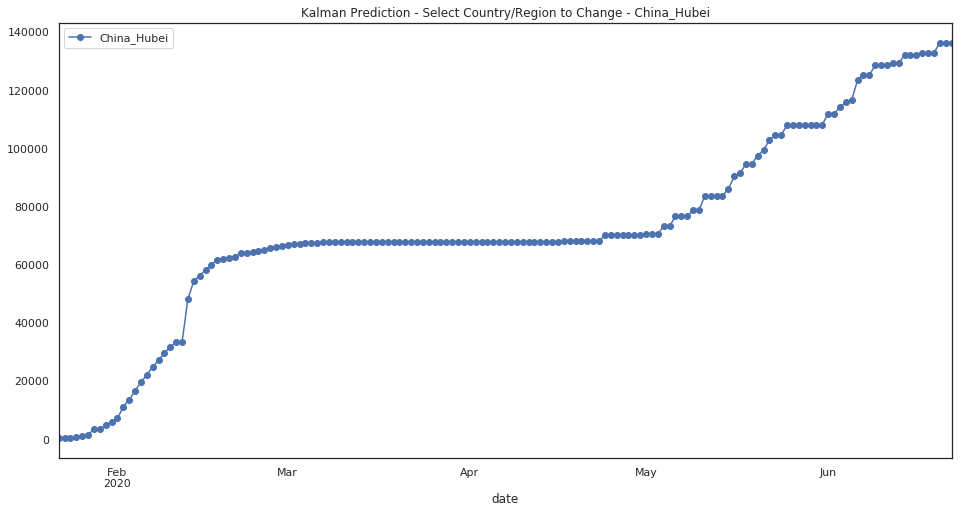

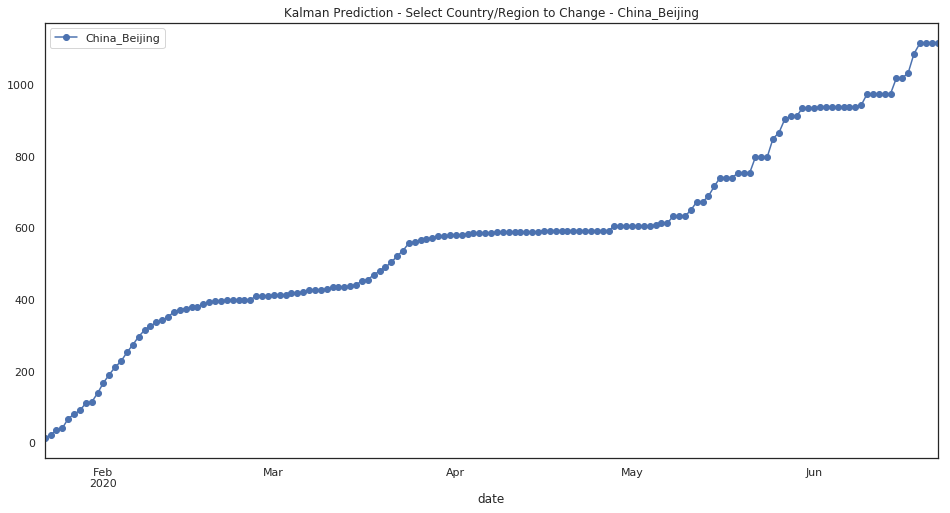

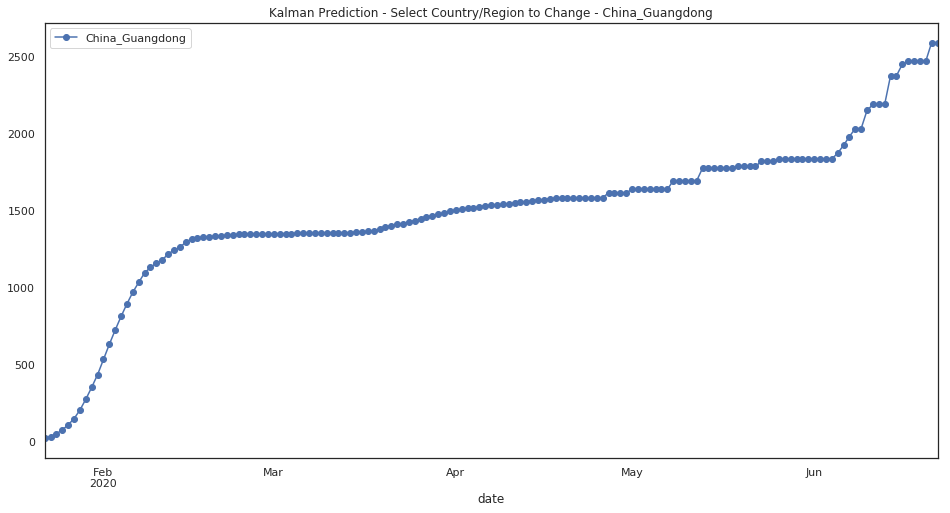

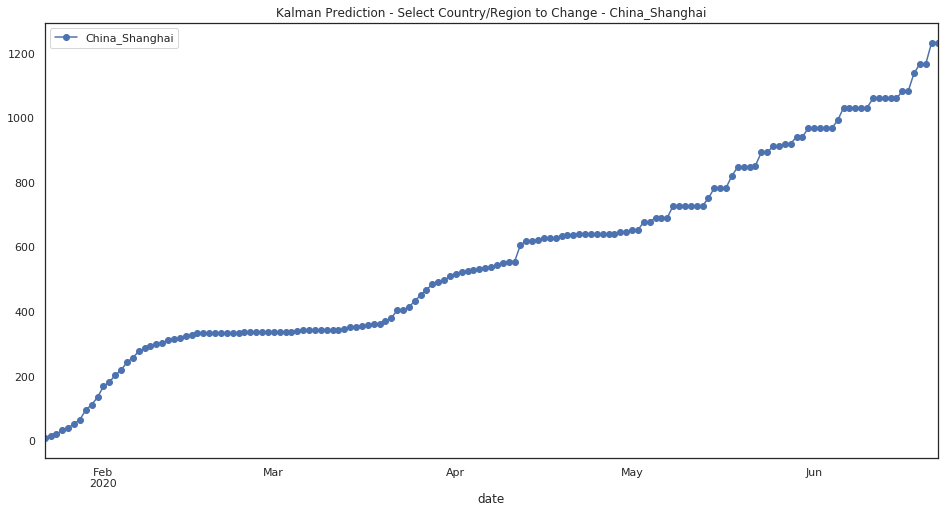

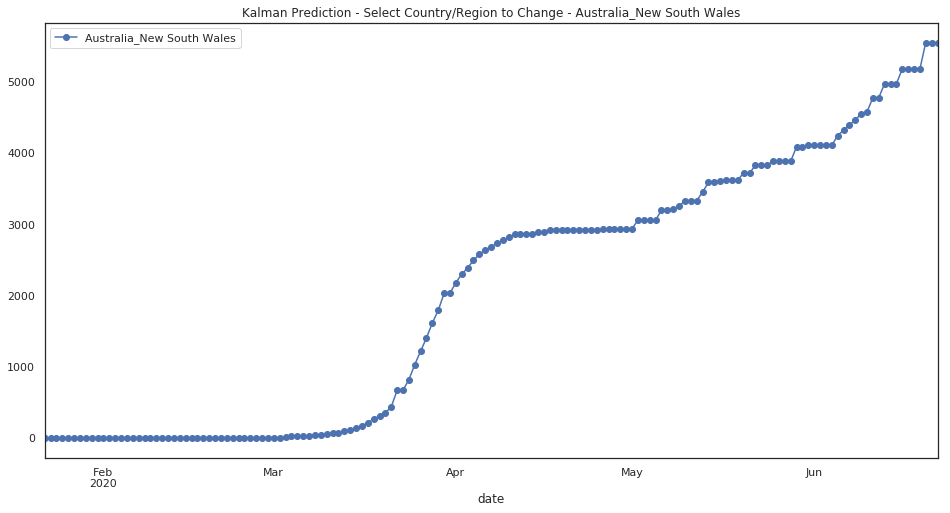

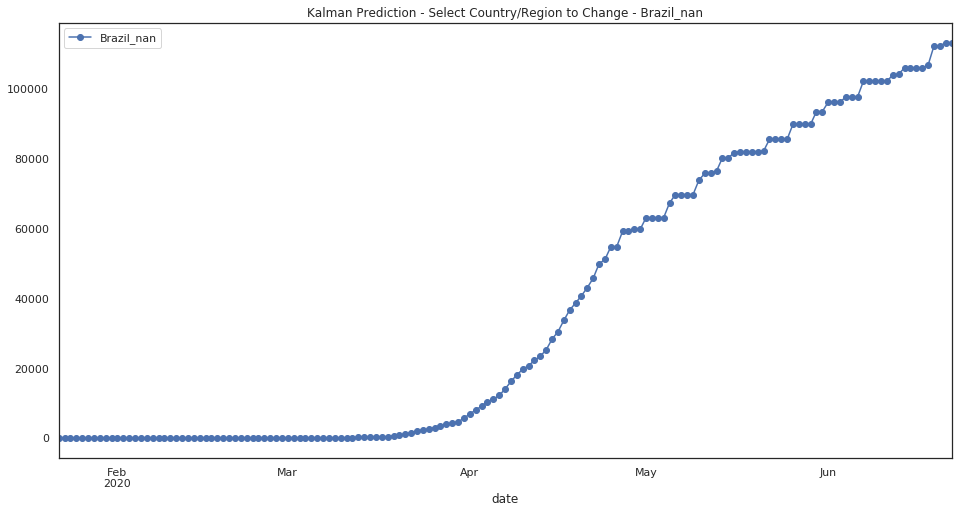

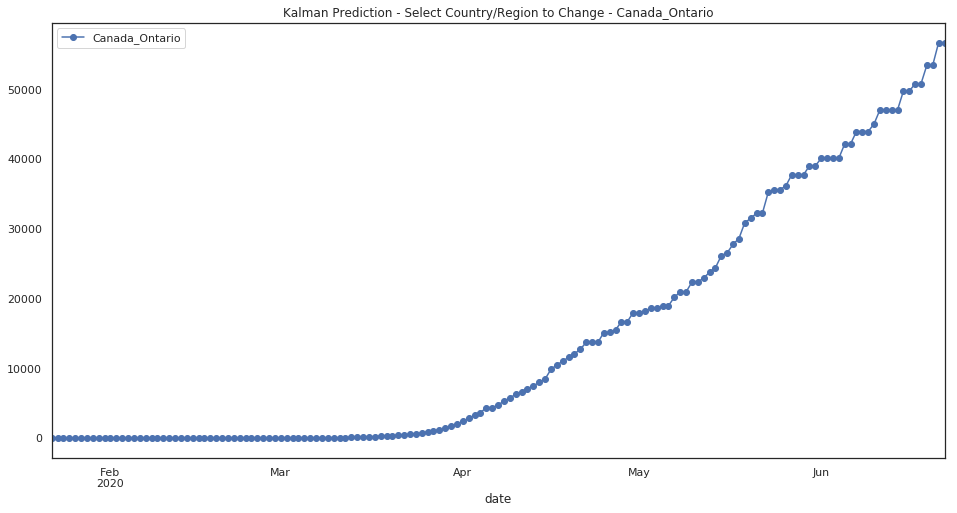

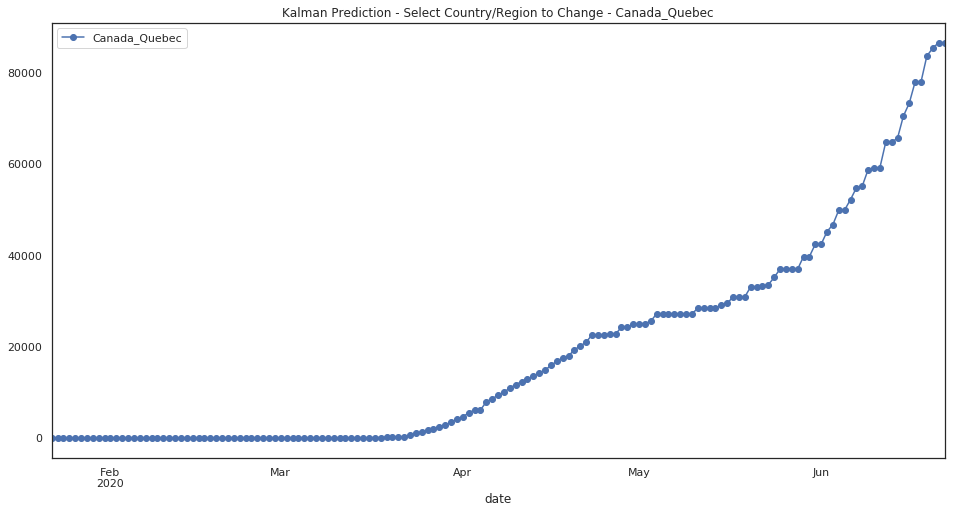

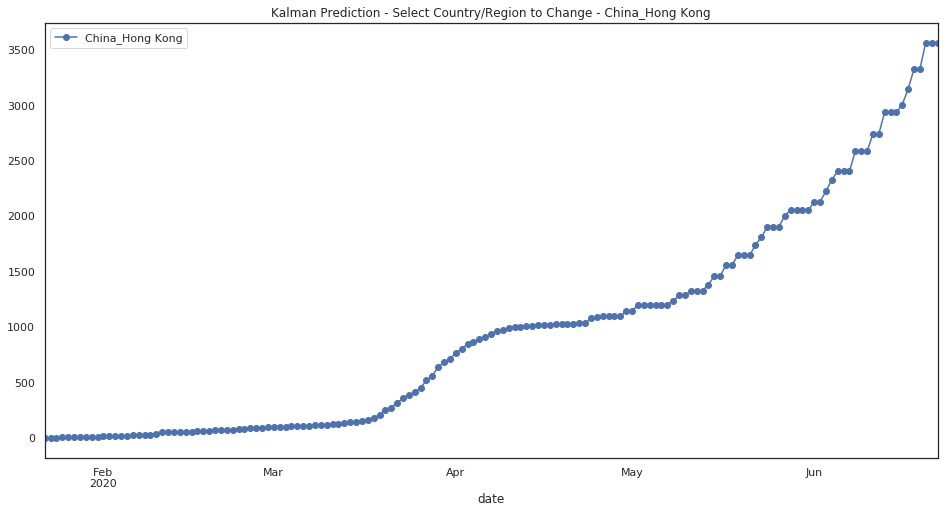

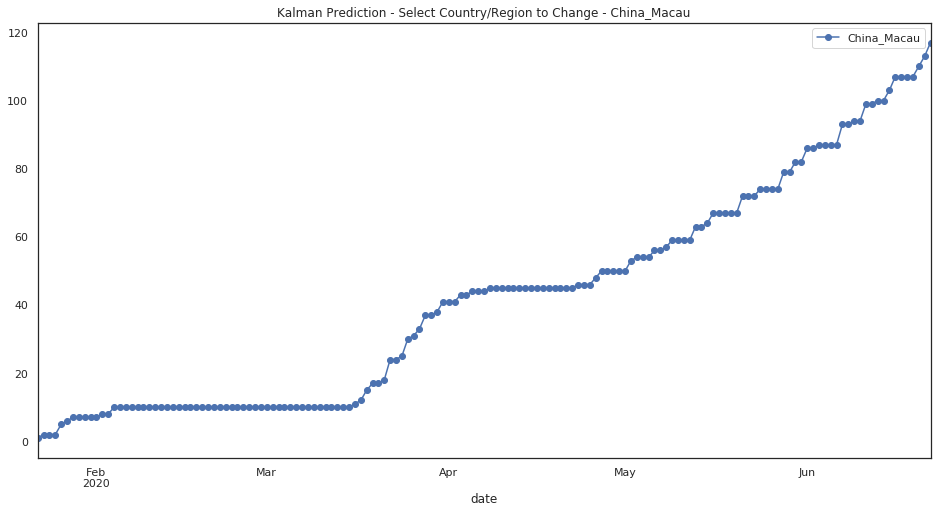

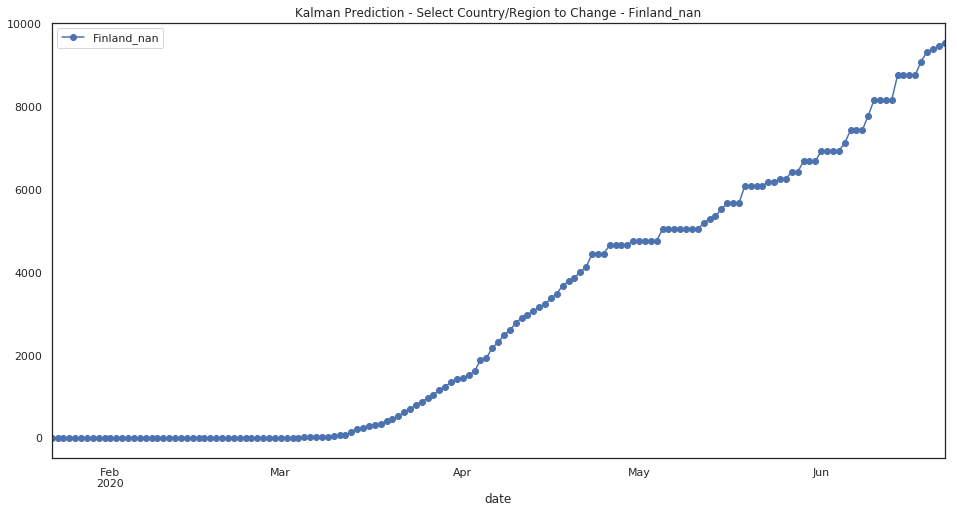

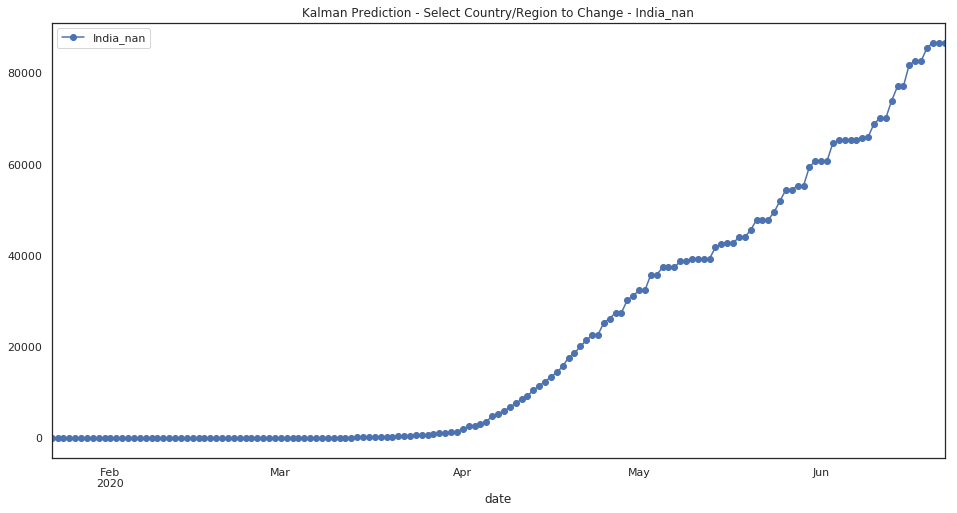

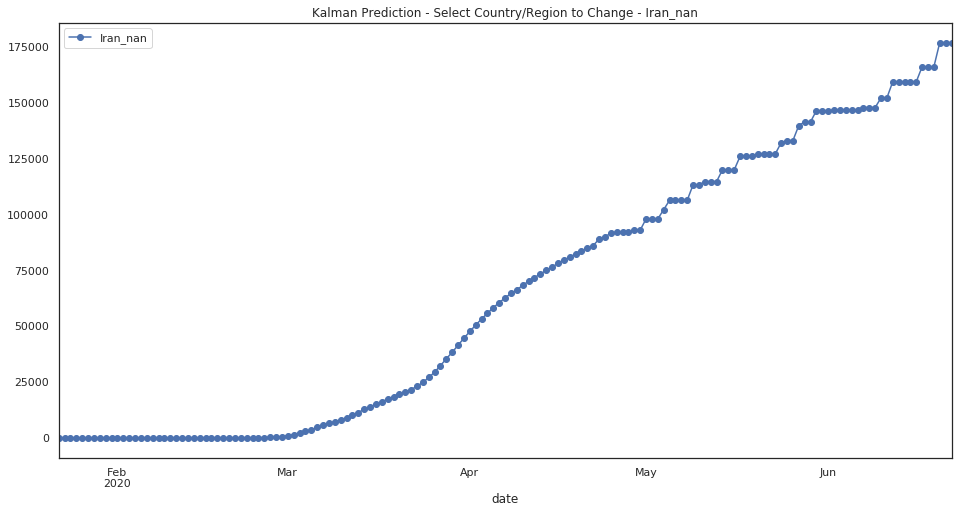

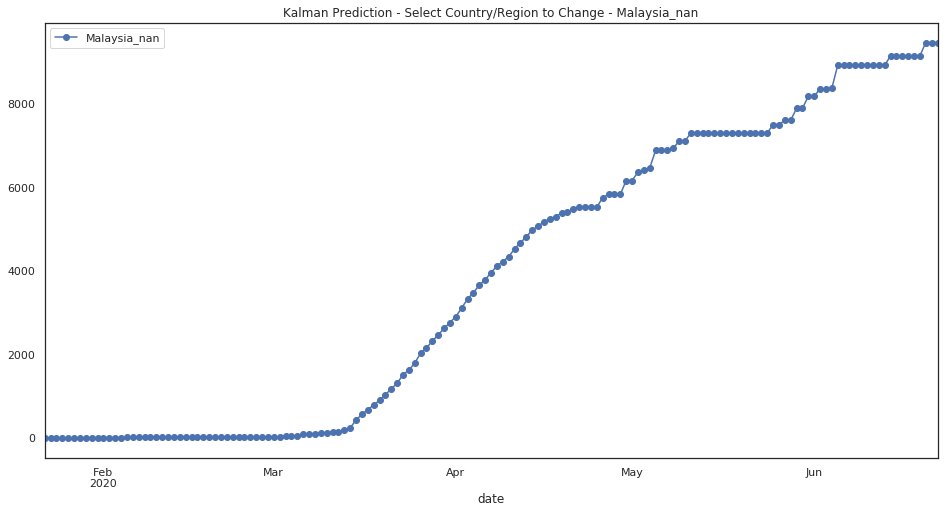

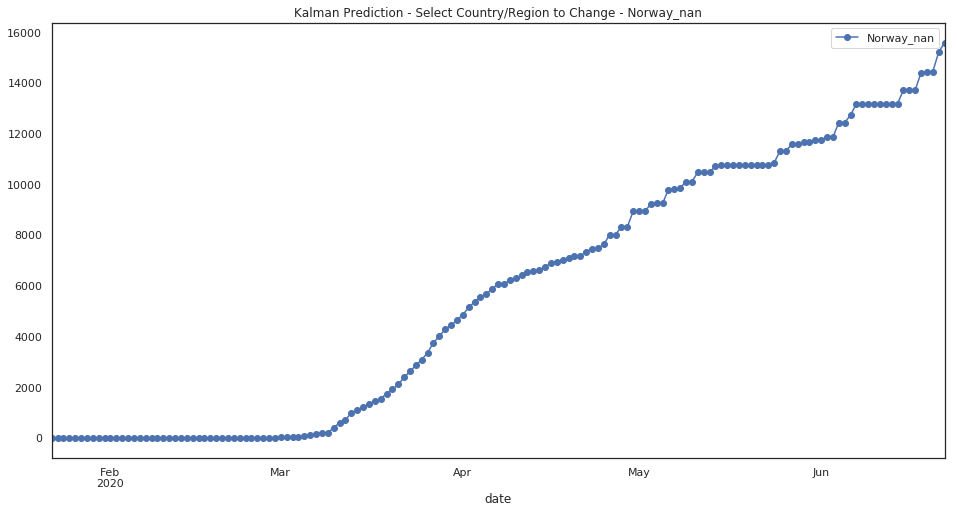

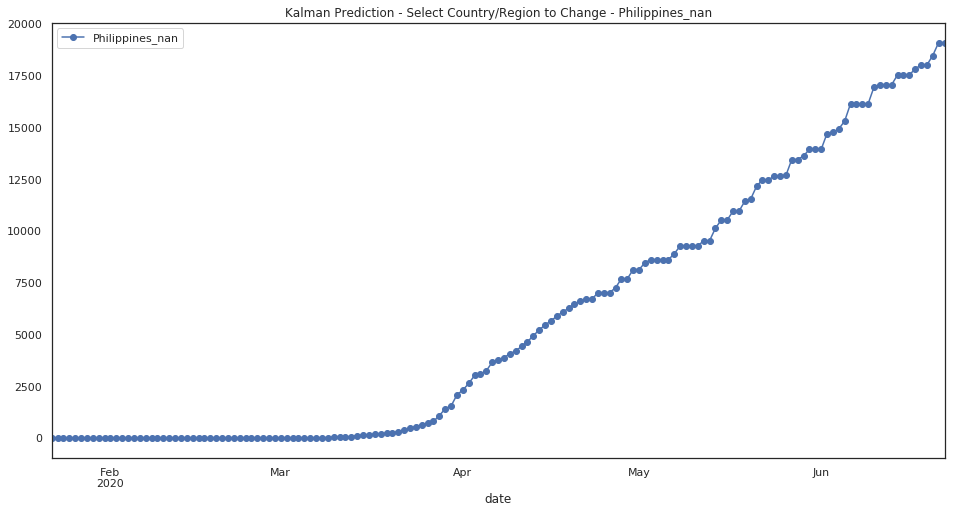

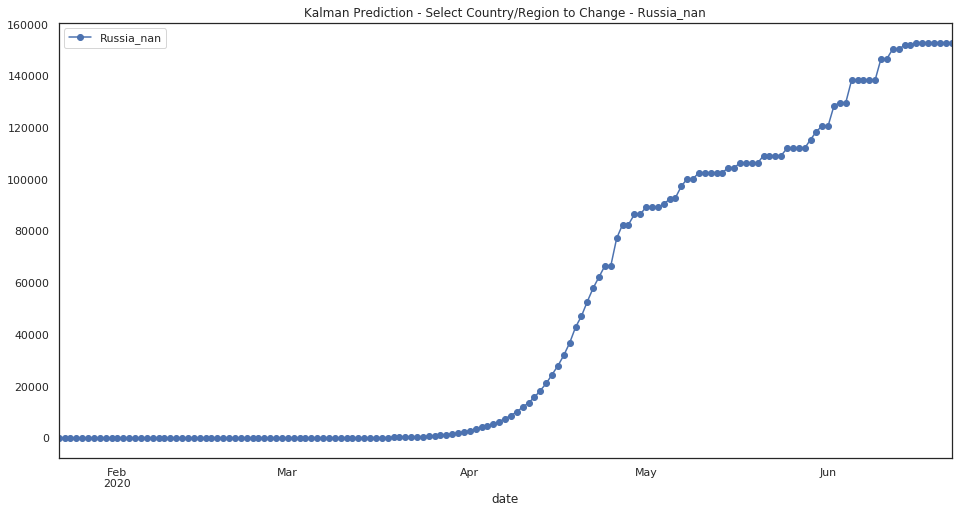

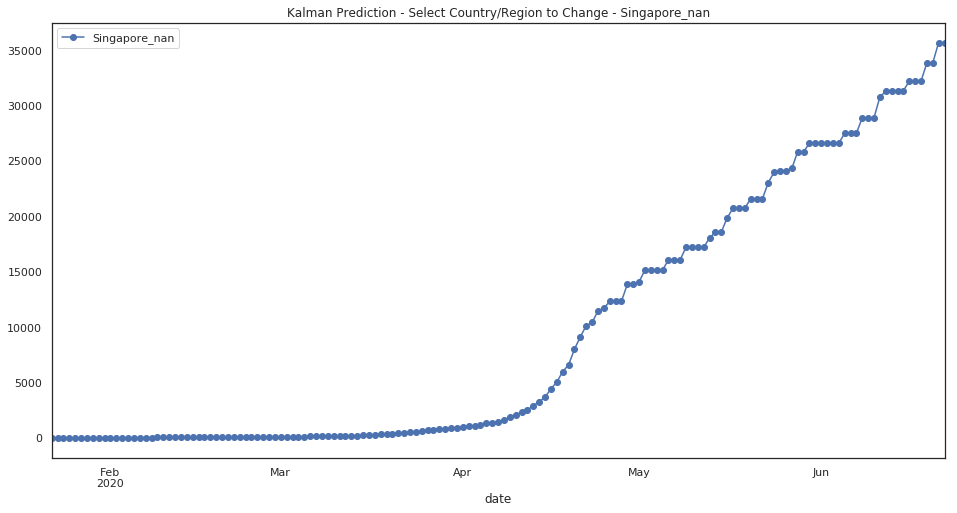

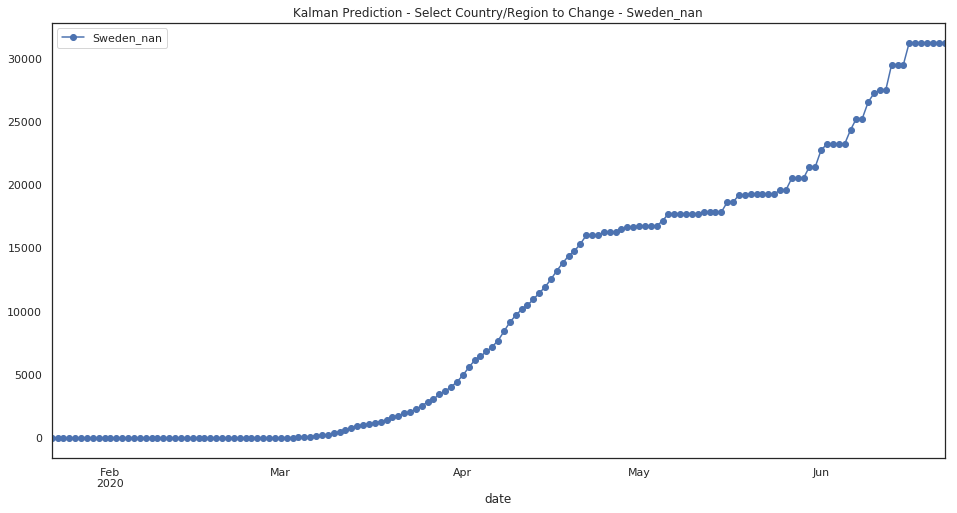

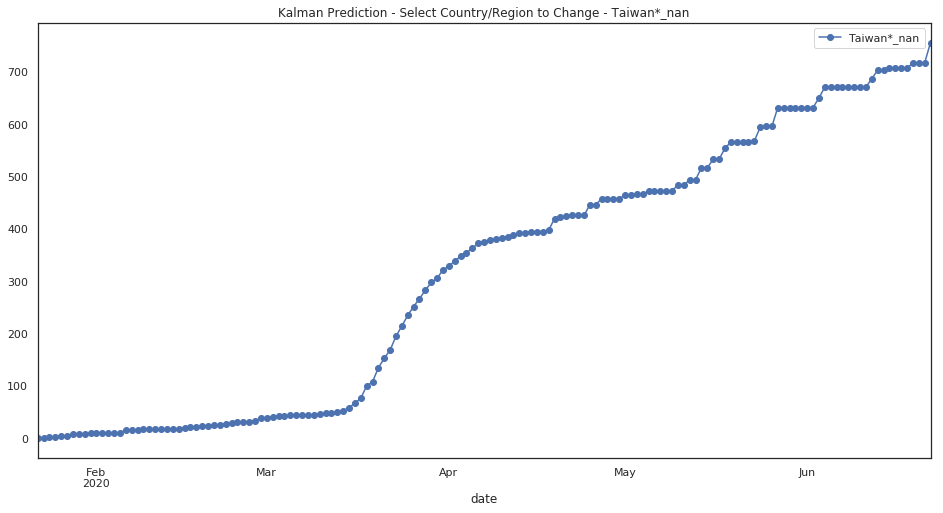

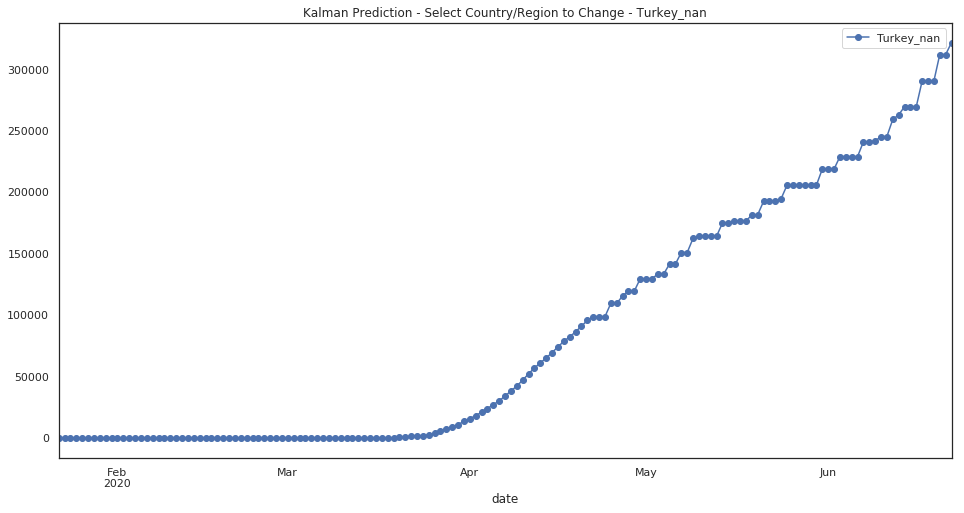

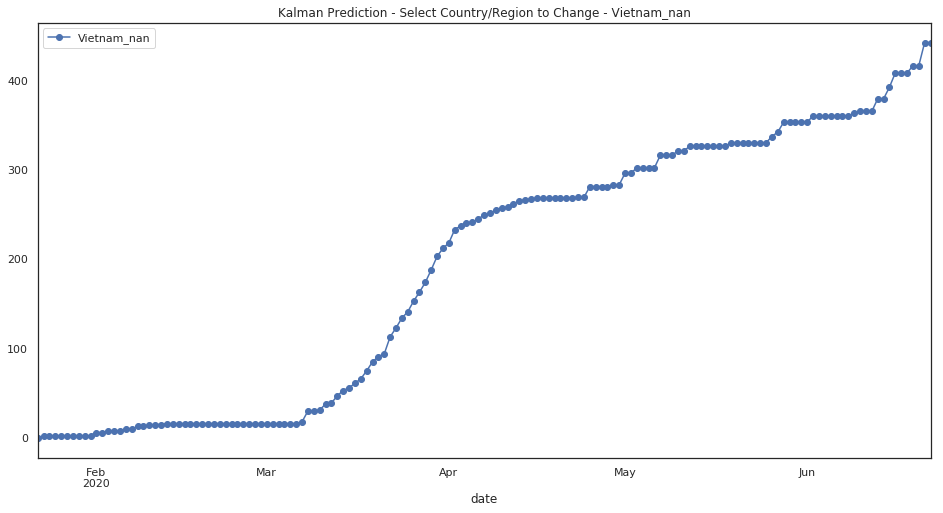

In [59]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [60]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-22 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       2706508.0
France_nan                                    NaN        355915.0
Germany_nan                                   NaN        353773.0
United Kingdom_nan                            NaN        347263.0
Spain_nan                                     NaN        333596.0
Italy_nan                                     NaN        325260.0
Turkey_nan                                    NaN        321635.0
Iran_nan                                      NaN        176708.0
Russia_nan                                    NaN        152902.0
China_Hubei                                   NaN        136361.0
Switzerland_nan                               NaN        119310.0
Brazil_nan                                    NaN        113272.0
Belgium_nan                                   NaN         92885.0
India_nan                                     NaN         86668.0
Canada_Quebec                                 NaN         86529.0
Netherlands_nan                               NaN         83129.0
Canada_Ontario                                NaN         56706.0
Portugal_nan                                  NaN         53246.0
Peru_nan                                      NaN         50094.0
Singapore_nan                                 NaN         35693.0
Ireland_nan                                   NaN         35640.0
Saudi Arabia_nan                              NaN         34171.0
Mexico_nan                                    NaN         31318.0
Sweden_nan                                    NaN         31237.0
Israel_nan                                    NaN         30116.0
Indonesia_nan                                 NaN         26506.0
Austria_nan                                   NaN         25319.0
Japan_nan                                     NaN         25263.0
Poland_nan                                    NaN         24849.0
Chile_nan                                     NaN         22642.0
...                                           ...             ...
Canada_Yukon                                  NaN            27.0
Netherlands_Curacao                           NaN            26.0
Saint Lucia_nan                               NaN            25.0
Namibia_nan                                   NaN            24.0
Papua New Guinea_nan                          NaN            22.0
Denmark_Greenland                             NaN            17.0
Seychelles_nan                                NaN            17.0
Grenada_nan                                   NaN            16.0
United Kingdom_Falkland Islands (Malvinas)    NaN            15.0
Canada_Grand Princess                         NaN            13.0
United Kingdom_Turks and Caicos Islands       NaN            11.0
Holy See_nan                                  NaN            10.0
Suriname_nan                                  NaN            10.0
Gambia_nan                                    NaN            10.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             8.0
Mauritania_nan                                NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Western Sahara_nan                            NaN             6.0
Bhutan_nan                                    NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Canada_Northwest Territories                  NaN             5.0
South Sudan_nan                               NaN             4.0
Sao Tome and Principe_nan                     NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
France_Saint Pierre and Miquelon              NaN             1.0
Yemen_nan                                     NaN             1.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princess                       NaN             0.0
Canada_Recovered      

In [61]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [62]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [63]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [64]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [65]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [66]:
pred[:-1]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-01-22             58.0       1204.0         44.0      46436.0   
2020-01-23             58.0       1204.0         44.0      46436.0   
2020-01-24             58.0       1204.0         44.0      46436.0   
2020-01-25             58.0       1204.0         44.0      46436.0   
2020-01-26             58.0       1204.0         44.0      46436.0   
2020-01-27             58.0       1204.0         44.0      46436.0   
2020-01-28             58.0       1204.0         44.0      46436.0   
2020-01-29             58.0       1204.0         44.0      46436.0   
2020-01-30             58.0       1204.0         44.0      46436.0   
2020-01-31             58.0       1204.0         44.0      46436.0   
2020-02-01             58.0       1204.0         44.0      46436.0   
2020-02-02             58.0       1204.0         44.0      46436.0   
2020-02-03             58.0       1204.0         44.0      46436.0   
2020-02-04             58.0       1204.0         44.0      46436.0   
2020-02-05             58.0       1204.0         44.0      46436.0   
2020-02-06             58.0       1204.0         44.0      46436.0   
2020-02-07             58.0       1204.0         44.0      46436.0   
2020-02-08             58.0       1204.0         44.0      46436.0   
2020-02-09             58.0       1204.0         44.0      46436.0   
2020-02-10             58.0       1204.0         44.0      46436.0   
2020-02-11             58.0       1204.0         44.0      46436.0   
2020-02-12             58.0       1204.0         44.0      46436.0   
2020-02-13             58.0       1204.0         44.0      46436.0   
2020-02-14             58.0       1204.0         44.0      46436.0   
2020-02-15             58.0       1204.0         44.0      46436.0   
2020-02-16             58.0       1204.0         44.0      46436.0   
2020-02-17             58.0       1204.0         44.0      46436.0   
2020-02-18            194.0       1204.0        147.0      46436.0   
2020-02-19            106.0       1204.0        155.0      46436.0   
2020-02-20            172.0       1204.0        144.0      46436.0   
...                     ...          ...          ...          ...   
2020-05-24         172189.0    1269419.0     422124.0   45410431.0   
2020-05-25         172190.0    1269410.0     435753.0   45410416.0   
2020-05-26         172213.0    1269410.0     435786.0   45410418.0   
2020-05-27         180473.0    1308102.0     435748.0   45782253.0   
2020-05-28         180495.0    1308108.0     444733.0   45782254.0   
2020-05-29         182230.0    1308113.0     444761.0   45782255.0   
2020-05-30         182205.0    1334312.0     444763.0   45782252.0   
2020-05-31         182206.0    1334316.0     444730.0   45782263.0   
2020-06-01         182202.0    1334331.0     444735.0   47920315.0   
2020-06-02         182220.0    1407962.0     444775.0   47920327.0   
2020-06-03         188855.0    1407984.0     458031.0   48617521.0   
2020-06-04         190810.0    1460405.0     458065.0   49082300.0   
2020-06-05         192549.0    1460391.0     458106.0   49082302.0   
2020-06-06         192530.0    1460403.0     471921.0   49082307.0   
2020-06-07         192543.0    1521545.0     471954.0   51173875.0   
2020-06-08         199777.0    1521554.0     471996.0   51173896.0   
2020-06-09         199792.0    1521555.0     486072.0   53311948.0   
2020-06-10         199796.0    1521554.0     486109.0   53311939.0   
2020-06-11         199790.0    1607675.0     486111.0   53311940.0   
2020-06-12         207450.0    1607688.0     486053.0   53311922.0   
2020-06-13         212258.0    1607698.0     486059.0   53311922.0   
2020-06-14         212269.0    1657597.0     486061.0   53311939.0   
2020-06-15         212245.0    1657614.0     486063.0   56379578.0   
2020-06-16         212245.0    1703794.0     486068.0   56379592.0   
2020-06-17

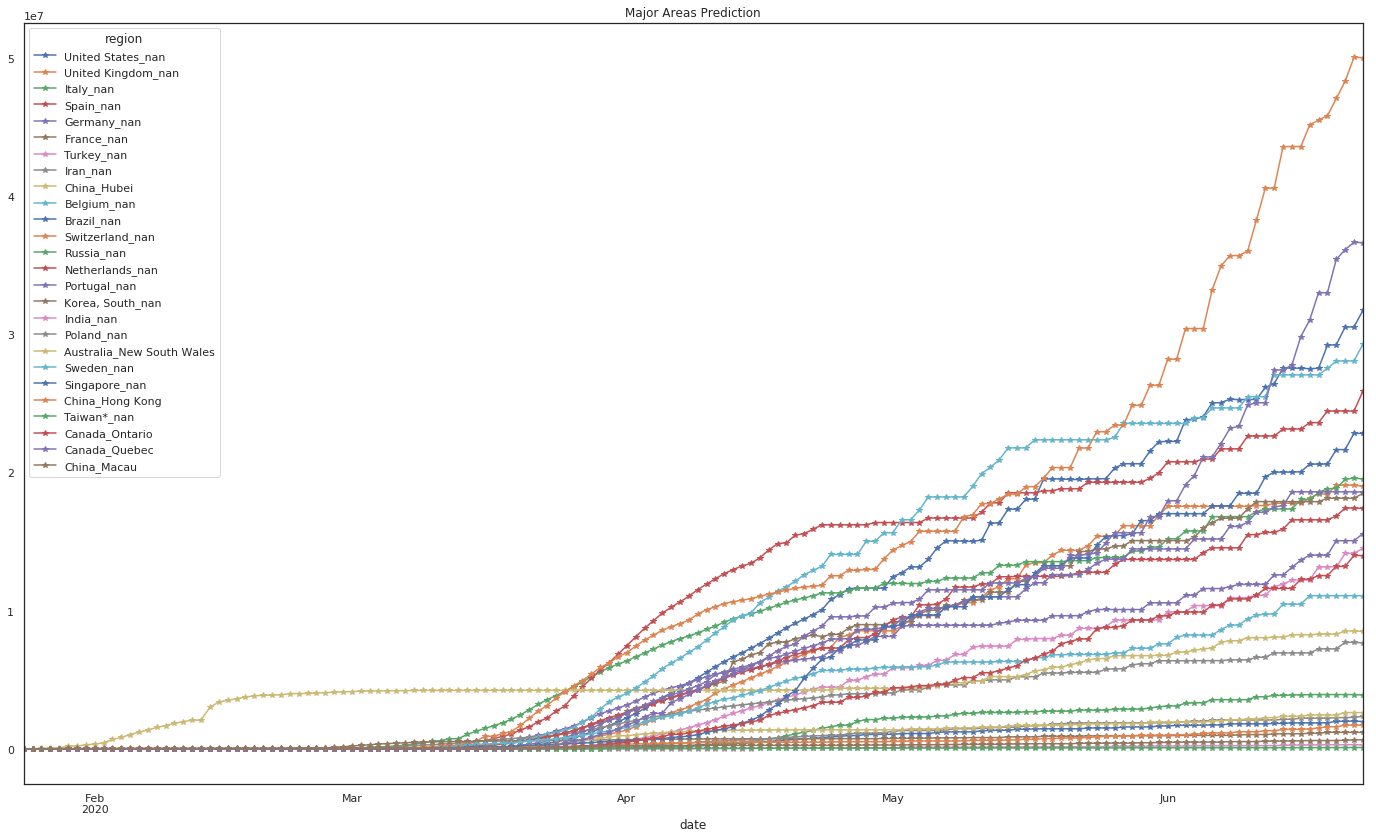

In [67]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

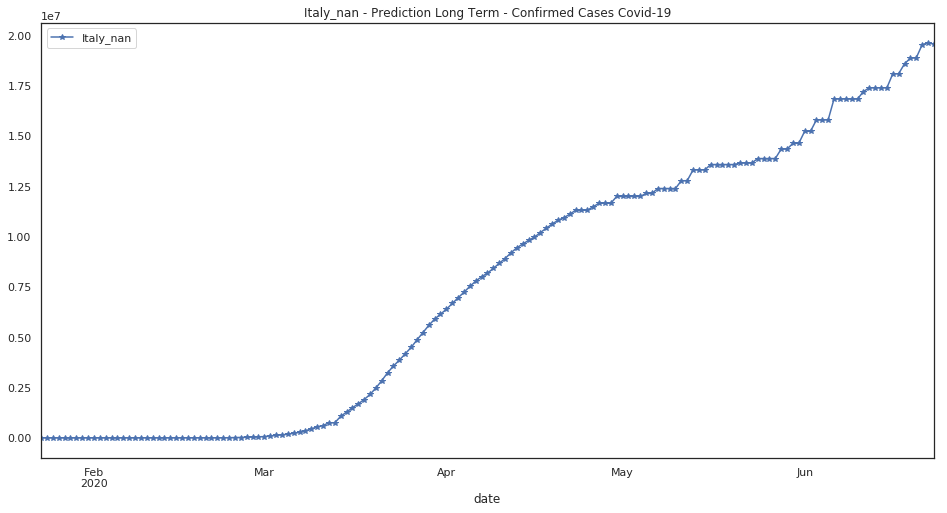

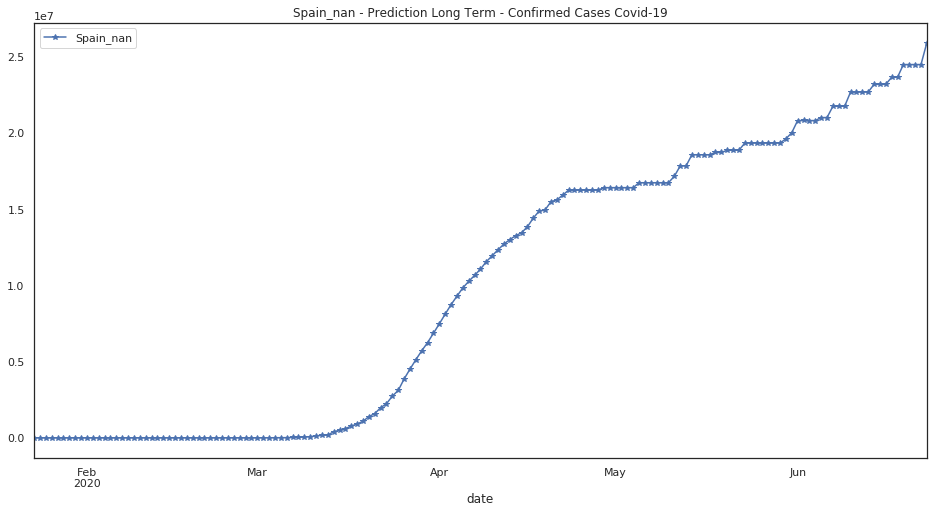

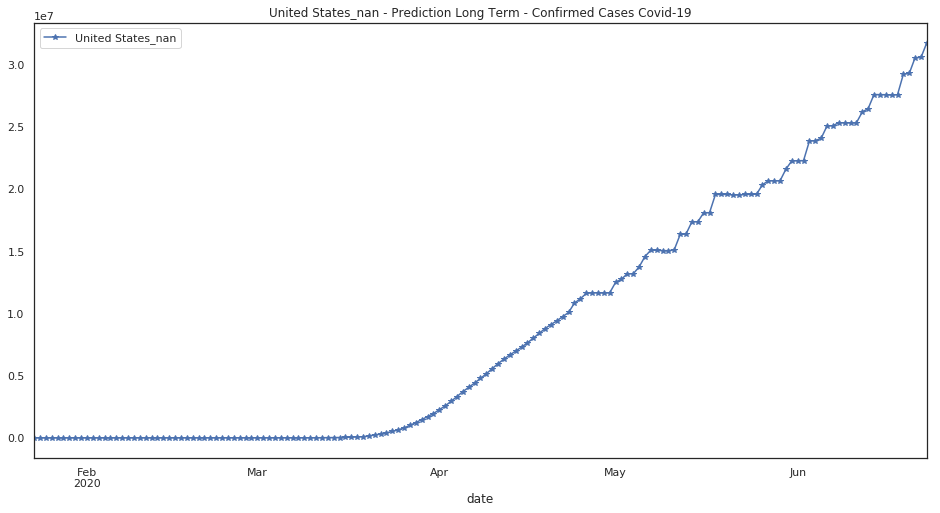

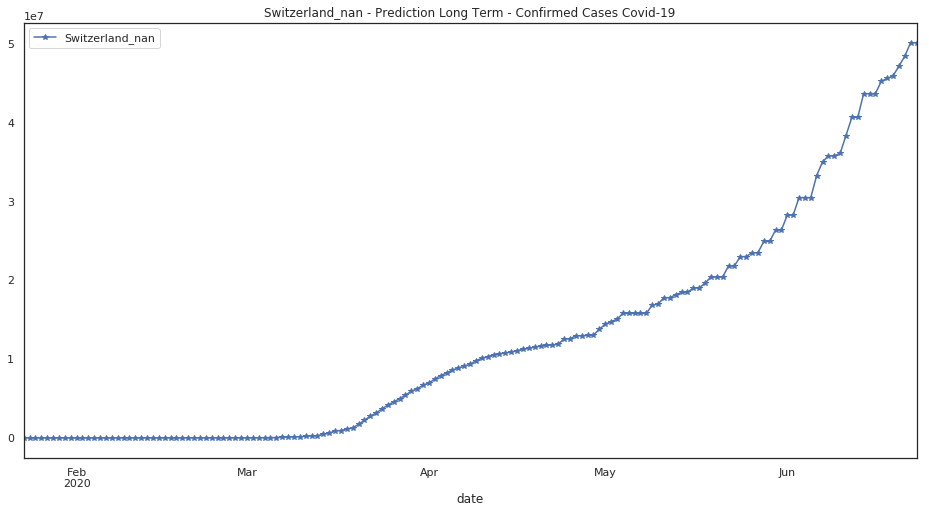

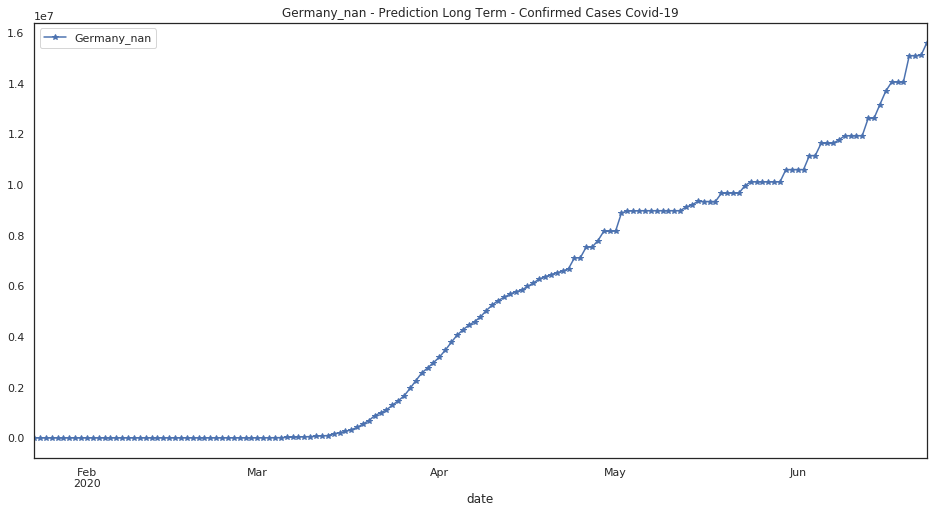

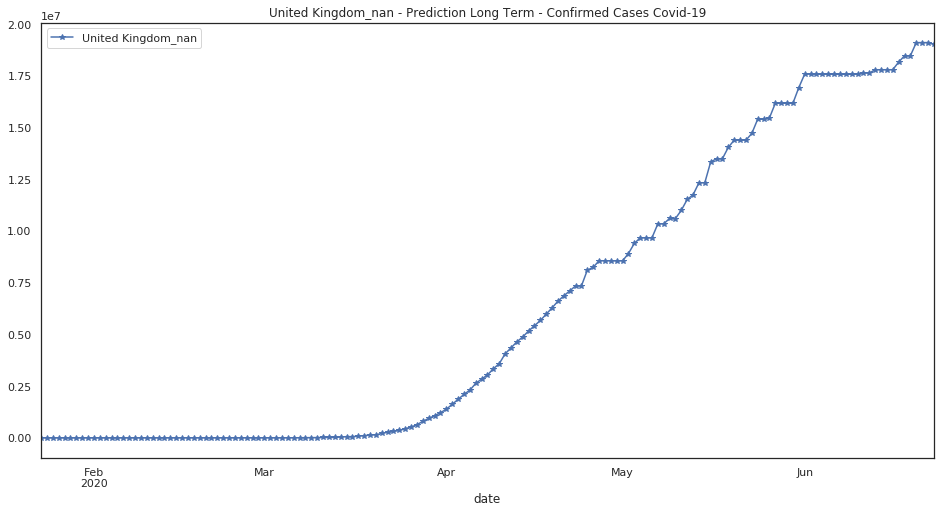

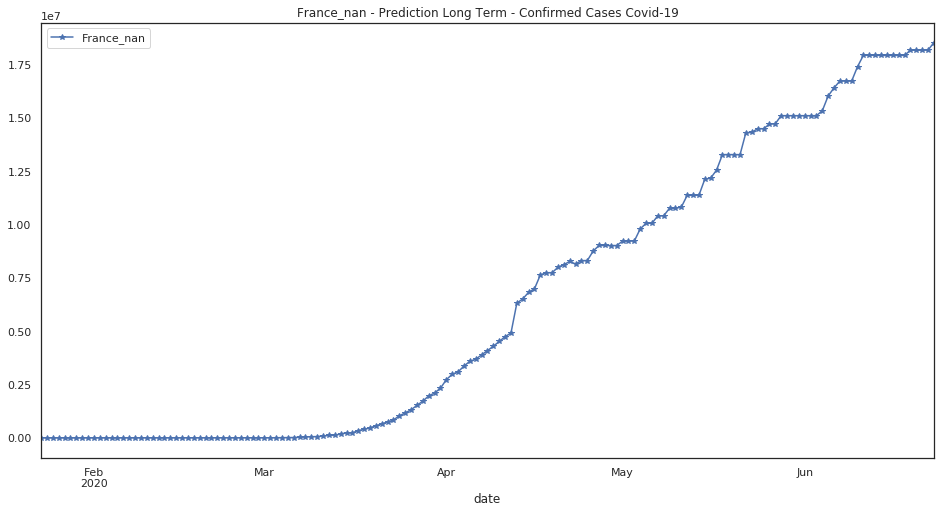

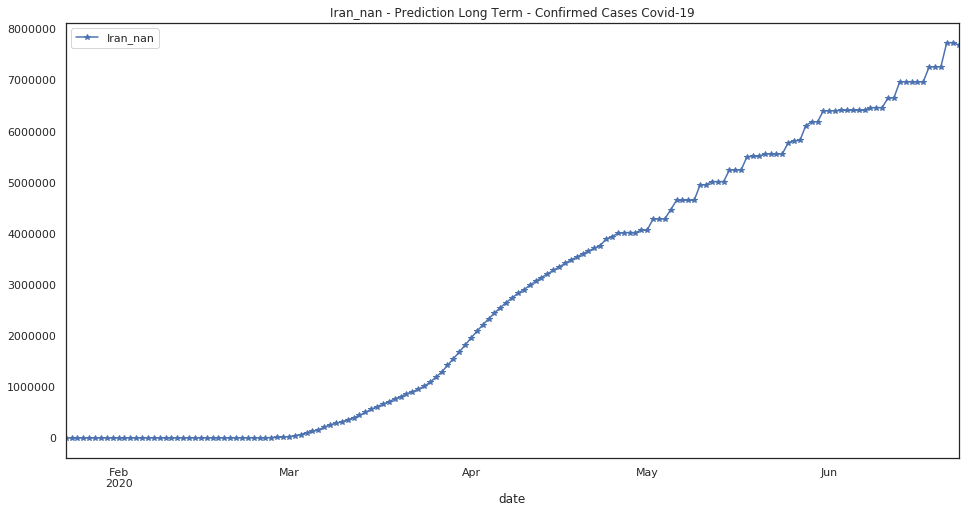

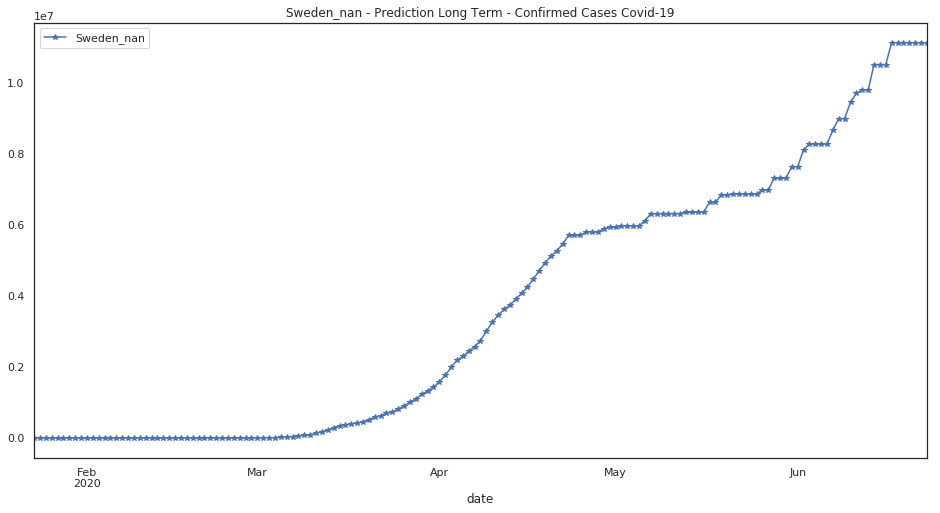

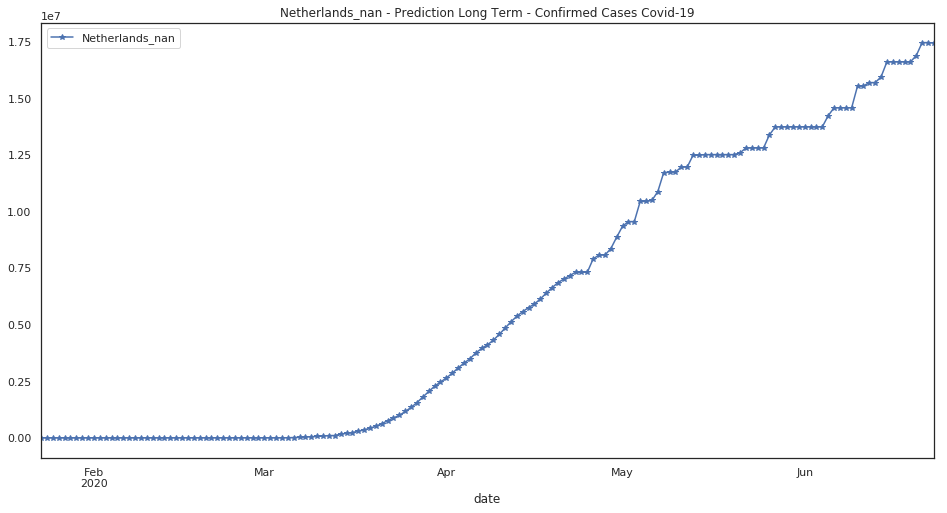

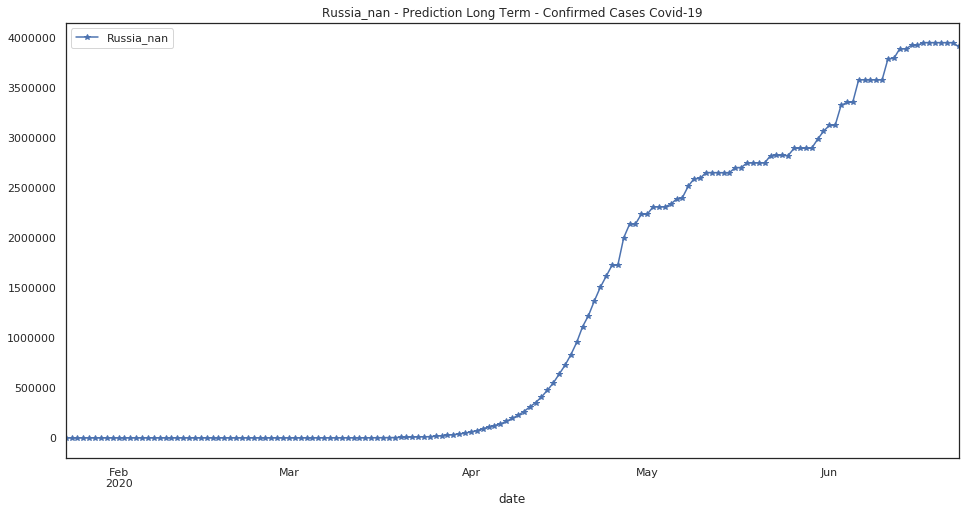

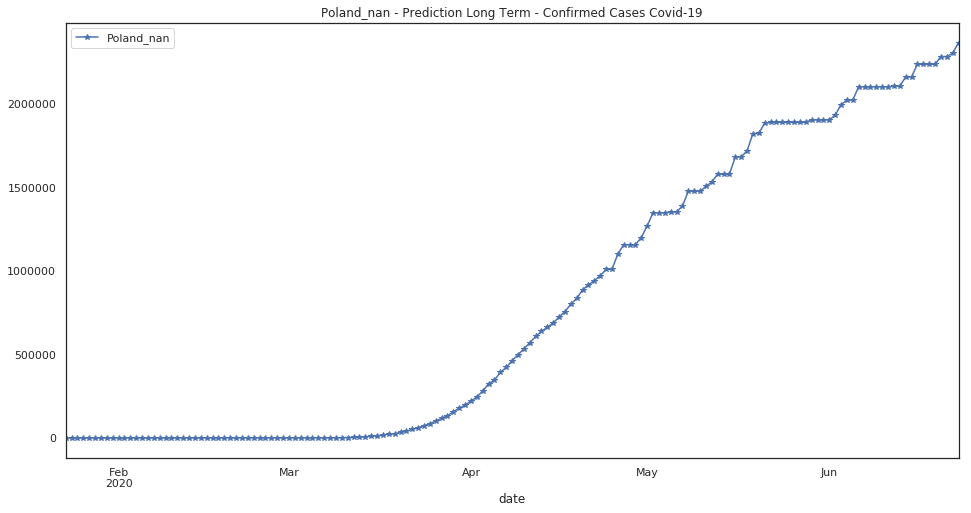

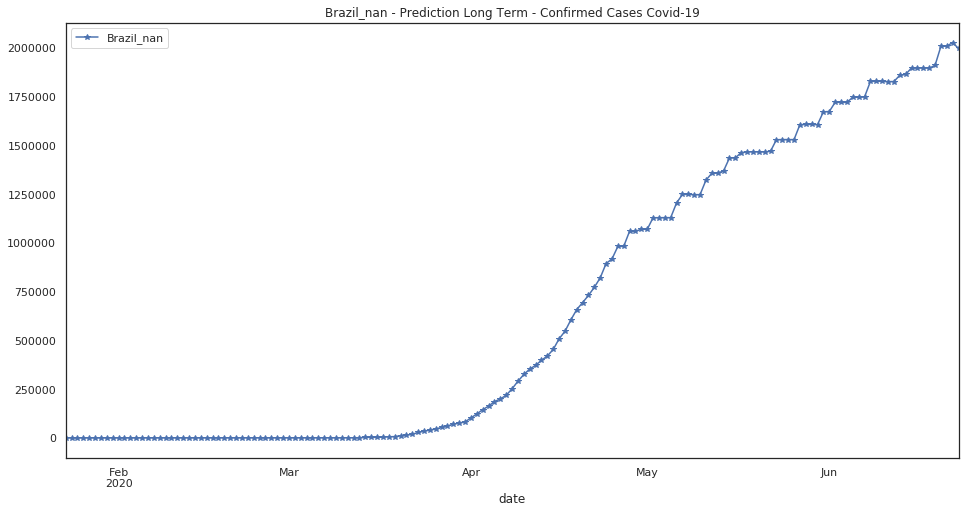

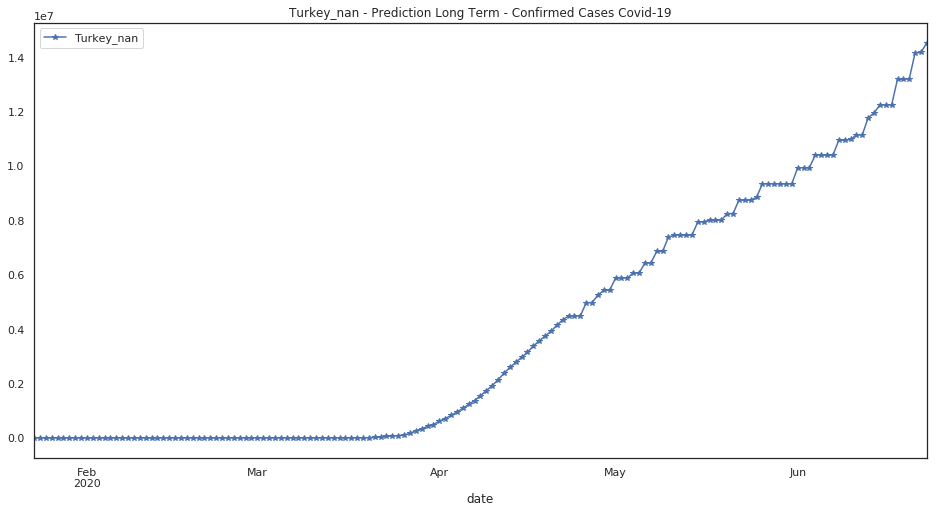

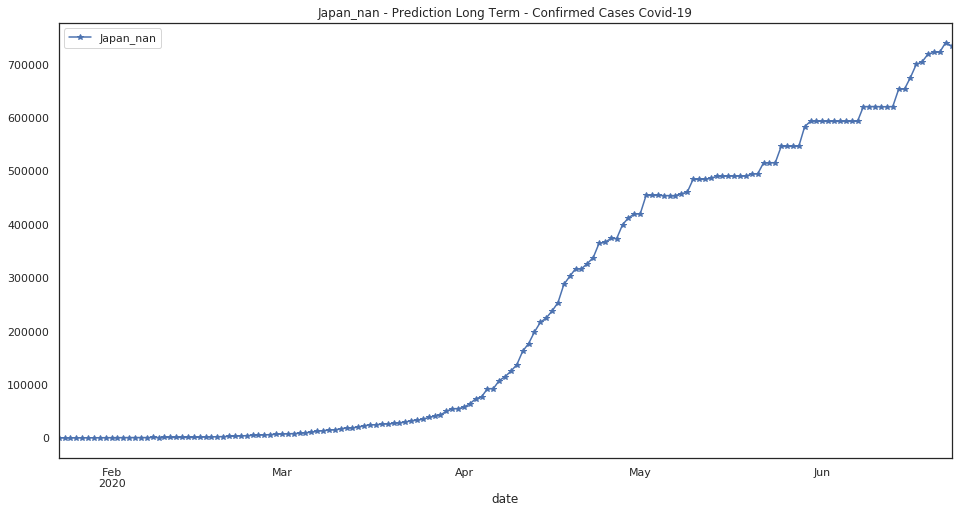

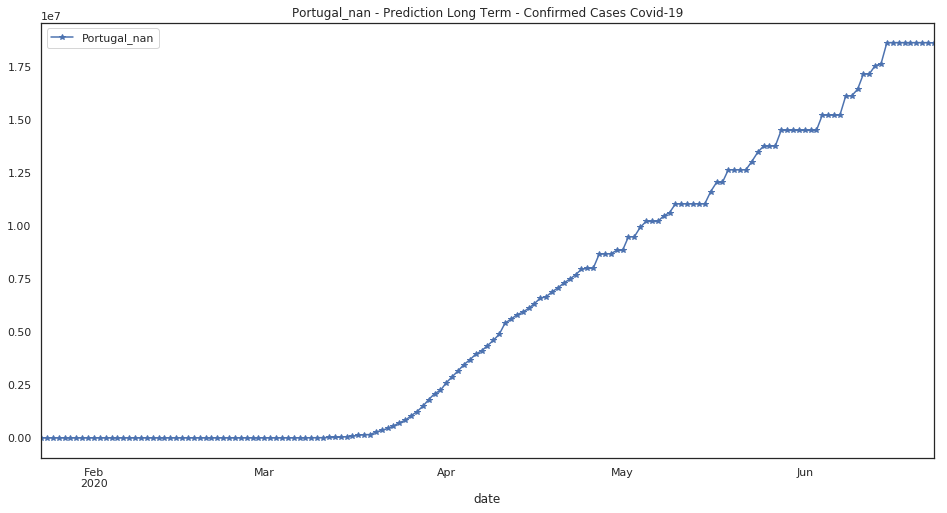

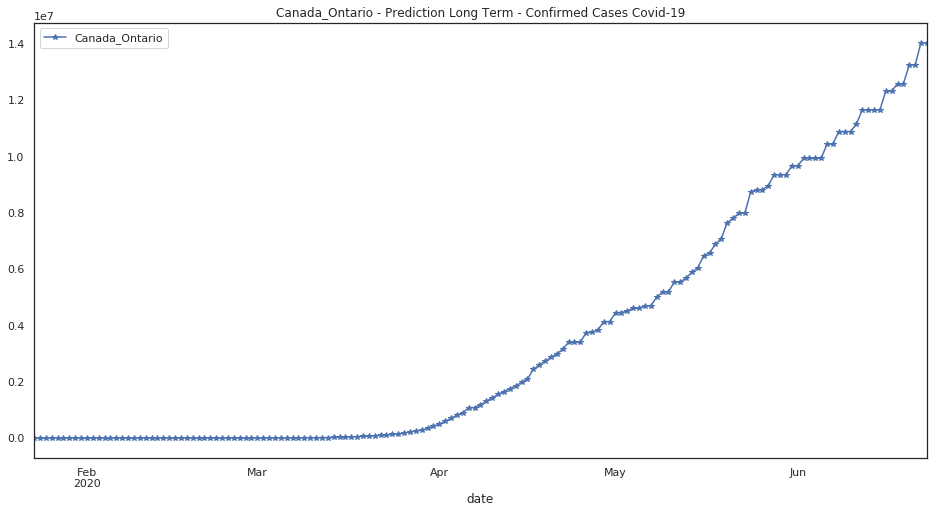

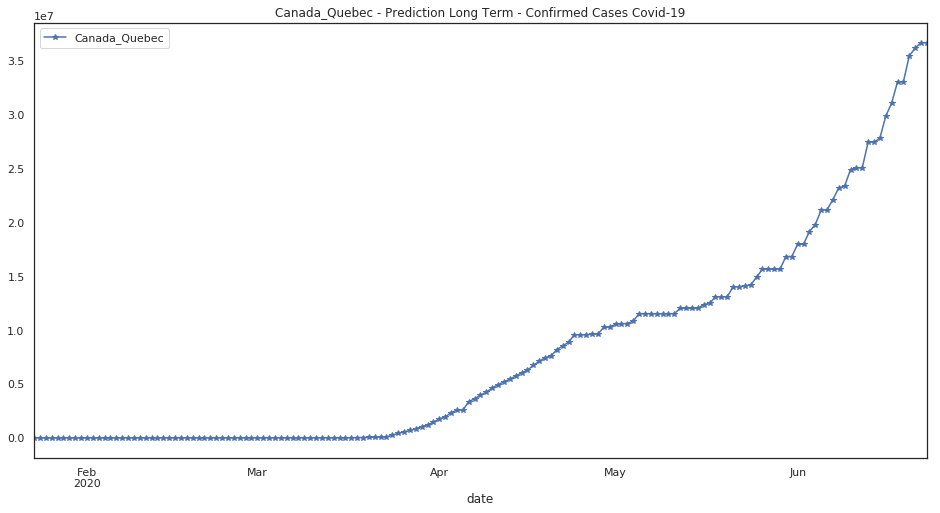

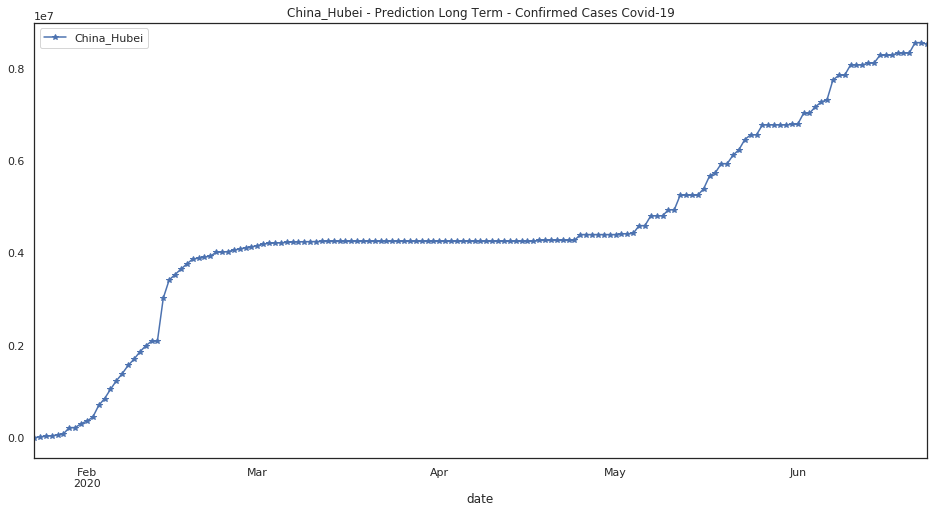

In [68]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[1:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

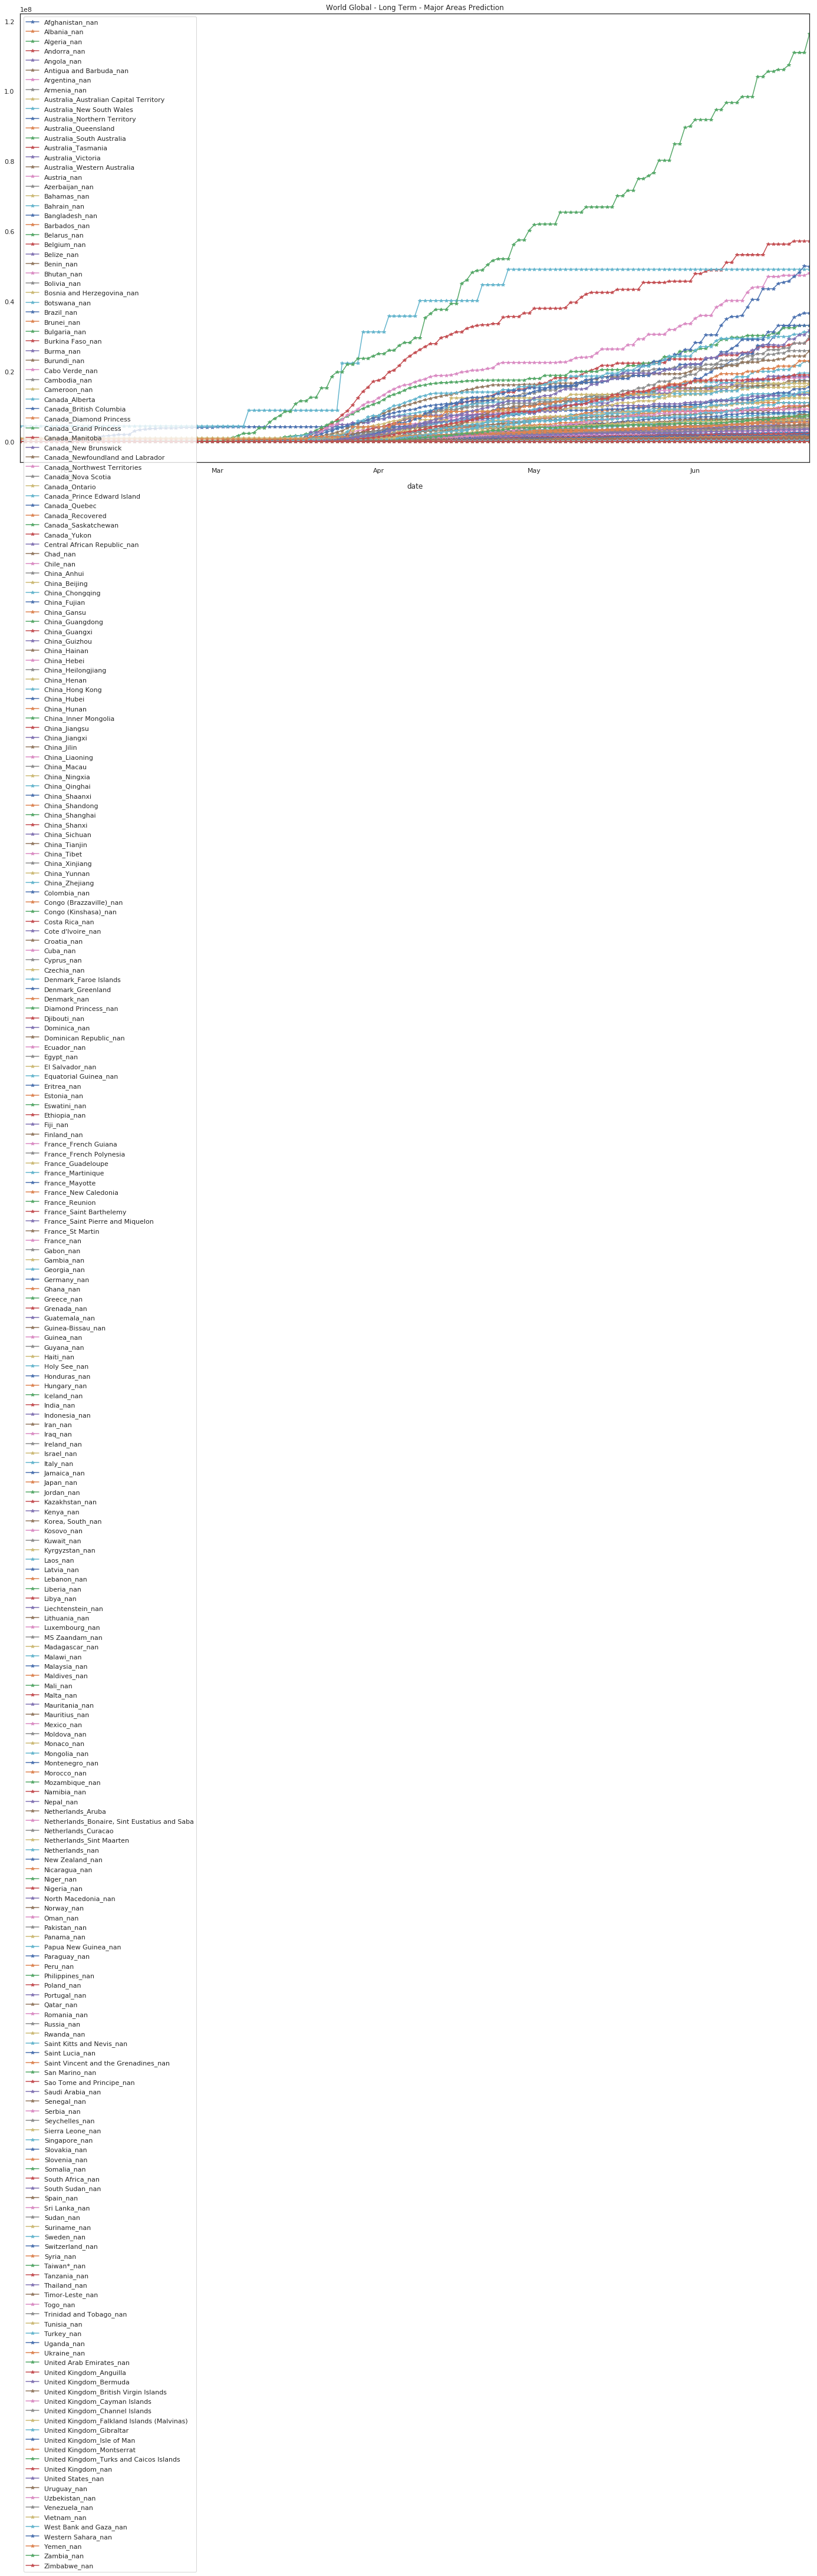

In [69]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [70]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [71]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-08            276.0       1204.0       1775.0      92942.0   
2020-03-09            632.0       1205.0       1976.0      92942.0   
2020-03-10            641.0       3703.0       1958.0      92948.0   
2020-03-11            789.0      13733.0       1941.0      92948.0   
2020-03-12            937.0      16200.0       1926.0      92948.0   
2020-03-13            939.0      30137.0       2276.0      92948.0   
2020-03-14            935.0      42472.0       2454.0      92948.0   
2020-03-15           1377.0      48710.0       3440.0      92948.0   
2020-03-16           1857.0      53678.0       4412.0      92948.0   
2020-03-17           2387.0      65067.0       4944.0     139470.0   
2020-03-18           2465.0      69930.0       5466.0    1860239.0   
2020-03-19           2445.0      74919.0       6700.0    1860086.0   
2020-03-20           2439.0      81142.0       7843.0    2510677.0   
2020-03-21           2646.0      88628.0       8116.0    3532930.0   
2020-03-22           2643.0      96119.0      12442.0    4137259.0   
2020-03-23           4295.0     112351.0      17906.0    5299403.0   
2020-03-24           4295.0     131079.0      20475.0    6228691.0   
2020-03-25           7805.0     154803.0      23447.0    7669161.0   
2020-03-26           8809.0     183517.0      26775.0    8784671.0   
2020-03-27           9842.0     218468.0      32492.0   10457933.0   
2020-03-28          11451.0     233442.0      36191.0   12456547.0   
2020-03-29          11449.0     247166.0      40143.0   14362206.0   
2020-03-30          12469.0     265879.0      45145.0   15570667.0   
2020-03-31          17579.0     279609.0      51584.0   17243912.0   
2020-04-01          17999.0     304574.0      63206.0   17522778.0   
2020-04-02          24441.0     324545.0      74748.0   18173488.0   
2020-04-03          28100.0     347016.0      86996.0   19939696.0   
2020-04-04          28924.0     380719.0     103235.0   20450980.0   
2020-04-05          30746.0     416921.0     110261.0   21705929.0   
2020-04-06          35841.0     451872.0     116307.0   23332704.0   
...                     ...          ...          ...          ...   
2020-05-25         172190.0    1269410.0     435753.0   45410416.0   
2020-05-26         172213.0    1269410.0     435786.0   45410418.0   
2020-05-27         180473.0    1308102.0     435748.0   45782253.0   
2020-05-28         180495.0    1308108.0     444733.0   45782254.0   
2020-05-29         182230.0    1308113.0     444761.0   45782255.0   
2020-05-30         182205.0    1334312.0     444763.0   45782252.0   
2020-05-31         182206.0    1334316.0     444730.0   45782263.0   
2020-06-01         182202.0    1334331.0     444735.0   47920315.0   
2020-06-02         182220.0    1407962.0     444775.0   47920327.0   
2020-06-03         188855.0    1407984.0     458031.0   48617521.0   
2020-06-04         190810.0    1460405.0     458065.0   49082300.0   
2020-06-05         192549.0    1460391.0     458106.0   49082302.0   
2020-06-06         192530.0    1460403.0     471921.0   49082307.0   
2020-06-07         192543.0    1521545.0     471954.0   51173875.0   
2020-06-08         199777.0    1521554.0     471996.0   51173896.0   
2020-06-09         199792.0    1521555.0     486072.0   53311948.0   
2020-06-10         199796.0    1521554.0     486109.0   53311939.0   
2020-06-11         199790.0    1607675.0     486111.0   53311940.0   
2020-06-12         207450.0    1607688.0     486053.0   53311922.0   
2020-06-13         212258.0    1607698.0     486059.0   53311922.0   
2020-06-14         212269.0    1657597.0     486061.0   53311939.0   
2020-06-15         212245.0    1657614.0     486063.0   56379578.0   
2020-06-16         212245.0    1703794.0     486068.0   56379592.0   
2020-06-17         218772.0    1703804.0     486070.0   56379592.0   
2020-06-18

In [72]:
p.to_csv('data/p+45_confirmed_daily.csv', index = False, header=True)

In [73]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [74]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region)].reset_index()

In [75]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
236                                Mozambique_nan -18.665695   35.529562   
237                                     Syria_nan  34.802075   38.996815   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257            

In [76]:
#!pip install folium
import folium 

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    popup = folium.Popup( heatmap_m['region'][num]+' pred='+str(totpred)+' date='+date_pred , parse_html=True)
    use_color=heatmap_m['region'][num][0]
    #print('use_color=',use_color)
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [77]:
heatmap_m2

index                     region      Lat      Long  2020-01-23 00:00:00  \
0       9  Australia_New South Wales -33.8688  151.2093                570.0   
1      23                Belgium_nan  50.8333    4.0000                300.0   
2      28                 Brazil_nan -14.2350  -51.9253                  0.0   
3      42             Canada_Ontario  51.2538  -85.3232                260.0   
4      44              Canada_Quebec  52.9399  -73.5491                380.0   
5      61            China_Hong Kong  22.3000  114.2000                460.0   
6      62                China_Hubei  30.9756  112.2707                444.0   
7      69                China_Macau  22.1667  113.5500               5753.0   
8     116                 France_nan  46.2276    2.2137                 94.0   
9     121                Germany_nan  51.0000    9.0000                 47.0   
10    132                  India_nan  21.0000   78.0000                 25.0   
11    134                   Iran_nan  32.0000   53.0000                  0.0   
12    138                  Italy_nan  43.0000   12.0000                128.0   
13    144           Korea, South_nan  36.0000  128.0000                120.0   
14    171            Netherlands_nan  52.1326    5.2913                166.0   
15    185                 Poland_nan  51.9194   19.1451                 52.0   
16    186               Portugal_nan  39.3999   -8.2245                366.0   
17    189                 Russia_nan  60.0000   90.0000                 88.0   
18    198              Singapore_nan   1.2833  103.8333                630.0   
19    203                  Spain_nan  40.0000   -4.0000                 94.0   
20    207                 Sweden_nan  63.0000   16.0000                394.0   
21    208            Switzerland_nan  46.8182    8.2275                376.0   
22    209                Taiwan*_nan  23.7000  121.0000                109.0   
23    215                 Turkey_nan  38.9637   35.2433                  2.0   
24    225         United Kingdom_nan  55.3781   -3.4360                 24.0   
25    227          United States_nan  37.0902  -95.7129                  1.0   

    2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
0                 476.0                447.0                486.0   
1                 318.0                308.0                260.0   
2                   0.0                  0.0                  0.0   
3                 224.0                218.0                226.0   
4                 380.0                380.0                380.0   
5                1408.0               1425.0               2927.0   
6               27925.0              34509.0              47955.0   
7               17301.0              17306.0              17354.0   
8                 149.0                223.0                259.0   
9                  78.0                 23.0                 67.0   
10                 50.0                 96.0                 79.0   
11                  0.0                  0.0                  0.0   
12                 98.0                 68.0                 88.0   
13                182.0                268.0                317.0   
14                166.0                166.0                166.0   
15                 52.0                 52.0                 52.0   
16                326.0                334.0                384.0   
17                155.0                129.0                 53.0   
18               1269.0               2586.0               2573.0   
19                 55.0                 63.0                112.0   
20                359.0                357.0                340.0   
21                376.0                376.0                376.0   
22                270.0                590.0                626.0   
23                  2.0                  2.0                  2.0   
24                 20.0                 18.0                 78.0   
25                  1.0                 10.0     

In [78]:
import folium 

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    popup2 = folium.Popup( heatmap_m2['region'][num2]+' pred='+str(totpred2)+' date='+date_pred , parse_html=True)  
    #print('use_color=',use_color)
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [79]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [80]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [81]:
exit()

H2O session _sid_8e44 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
